In [1]:
%load_ext autoreload
%autoreload 2

# Create MEIs with a pretrained model

In [11]:
import matplotlib.pyplot as plt
import math
import torch

import datajoint as dj
dj.config['database.host'] = 'at-database.ad.bcm.edu:3306'

dj.conn()

#define the external storage
dj.config['stores'] = {
  'minio': dict( # 'raw' storage for this pipeline
                protocol='file',
                location='/mnt/dj-stor01/users/maria/mouse_neuropixels_meis') #'cifs://at-storage5.ad.bcm.edu/dj-stor01/users/maria/''
}

dj.config["enable_python_native_blobs"] = True
dj.config['nnfabrik.schema_name'] = 'mouse_neuropixels_meis'
dj.config['mei.schema_name'] = 'mouse_neuropixels_meis'

from sensorium.schemas import schema, Fabrikant, Dataset, Model, Trainer, Seed, TrainedModel, MEISeed, MEIMethod, MEISelector, TrainedEnsembleModel, MEI
from sensorium.schemas.scores import CorrelationToAverage, ValidationCorrelationToSingle

In [2]:
(Dataset() )

dataset_fn name of the dataset loader function,dataset_hash hash of the configuration object,dataset_config dataset configuration object,dataset_fabrikant Name of the contributor that added this entry,dataset_comment short description,dataset_ts UTZ timestamp at time of insertion
sensorium.datasets.static_loaders,17a917c720720314835865d32cac93f3,=BLOB=,maria,MD_28470_13_1_su_goodvar,2022-12-01 18:10:07
sensorium.datasets.static_loaders,1965faa22eda4e393f44274b83d748d2,=BLOB=,maria,MD_28488_10_1_su_goodvar,2022-11-29 14:55:45
sensorium.datasets.static_loaders,2c111ac18fa164e37404e950abb82dc7,=BLOB=,maria,MD_102_116_allu_goodvar,2022-11-17 09:49:42
sensorium.datasets.static_loaders,48b2973c6bf9f6e3e42b8f488a90c676,=BLOB=,maria,MD_28489_13_1_su_goodvar_ext,2022-11-20 13:09:50
sensorium.datasets.static_loaders,5621b7039ca4a8c6931798127a20cfcb,=BLOB=,maria,MD_28489_25_1_su_goodvar_ext,2022-11-23 16:51:17
sensorium.datasets.static_loaders,6bf49110998881f8838fa98b47fab1a4,=BLOB=,maria,MD_4ses_an102_107_128_sua_goodvar,2022-11-16 13:35:46
sensorium.datasets.static_loaders,811ec7c0517db5e243298441f614ceaf,=BLOB=,maria,MD_28489_5_1_su_goodvar_ext,2022-11-19 15:14:19
sensorium.datasets.static_loaders,8792468a701421f5877b4534327977cb,=BLOB=,maria,MD_28488_21_1_su_goodvar,2022-12-01 12:08:52
sensorium.datasets.static_loaders,97abf77dd9cf4adfe2772ad384abffe5,=BLOB=,maria,MD_28488_16_1_su_goodvar,2022-11-30 13:03:41
sensorium.datasets.static_loaders,9a1966a89f21d5671d067db5e33dfe29,=BLOB=,maria,MD_4ses_an102_107_128_allu_goodvar,2022-11-17 00:41:49


In [3]:
Model()

model_fn name of the model function,model_hash hash of the model configuration,model_config model configuration to be passed into the function,model_fabrikant Name of the contributor that added this entry,model_comment short description,model_ts UTZ timestamp at time of insertion
sensorium.models.stacked_core_full_gauss_readout,192c096b2b4adfc880fd29b995e2a07f,=BLOB=,maria,simple LN model,2022-11-21 20:53:42
sensorium.models.stacked_core_full_gauss_readout,7278b720cc903fb027668bb5530c202f,=BLOB=,maria,state of the art model,2022-11-16 12:50:30
sensorium.models.transfer_core_fullgauss_readout,afd8b886620ebbe4ba3aa102ddfbc293,=BLOB=,maria,"sota pretrained model for transfer of 4sessions from animals 102,107,128_all units",2022-11-17 09:53:04
sensorium.models.transfer_core_fullgauss_readout,b33175d262574dce108630081bf8a111,=BLOB=,maria,"LN pretrained model for transfer of 4sessions from animals 102,107,128_all units",2022-11-21 21:45:18
sensorium.models.transfer_core_fullgauss_readout,d2edad633ae70e5d164b443846c4f495,=BLOB=,maria,"sota pretrained model for transfer of 4sessions from animals 102,107,128",2022-11-16 14:22:03


In [4]:
(TrainedModel() )

model_fn name of the model function,model_hash hash of the model configuration,dataset_fn name of the dataset loader function,dataset_hash hash of the configuration object,trainer_fn name of the Trainer loader function,trainer_hash hash of the configuration object,seed Random seed that is passed to the model- and dataset-builder,comment short description,score loss,output trainer object's output,fabrikant_name Name of the contributor that added this entry,trainedmodel_ts UTZ timestamp at time of insertion
sensorium.models.stacked_core_full_gauss_readout,192c096b2b4adfc880fd29b995e2a07f,sensorium.datasets.static_loaders,9a1966a89f21d5671d067db5e33dfe29,sensorium.training.standard_trainer,328fbc5c2eecd0d5b0605ab037a70373,1000,default trainer 200 iter.simple LN model.MD_4ses_an102_107_128_allu_goodvar,0.165172,=BLOB=,maria,2022-11-21 21:19:35
sensorium.models.stacked_core_full_gauss_readout,7278b720cc903fb027668bb5530c202f,sensorium.datasets.static_loaders,6bf49110998881f8838fa98b47fab1a4,sensorium.training.standard_trainer,328fbc5c2eecd0d5b0605ab037a70373,1000,default trainer 200 iter.state of the art model.MD_4ses_an102_107_128_sua_goodvar,0.252981,=BLOB=,maria,2022-11-16 13:58:32
sensorium.models.stacked_core_full_gauss_readout,7278b720cc903fb027668bb5530c202f,sensorium.datasets.static_loaders,9a1966a89f21d5671d067db5e33dfe29,sensorium.training.standard_trainer,328fbc5c2eecd0d5b0605ab037a70373,1000,default trainer 200 iter.state of the art model.MD_4ses_an102_107_128_allu_goodvar,0.266669,=BLOB=,maria,2022-11-17 01:25:12
sensorium.models.stacked_core_full_gauss_readout,7278b720cc903fb027668bb5530c202f,sensorium.datasets.static_loaders,f6e1597f9a26509275661669ea3dcc9b,sensorium.training.standard_trainer,328fbc5c2eecd0d5b0605ab037a70373,10,default trainer 200 iter.state of the art model.MD_102_116_sua_goodvar,0.280461,=BLOB=,maria,2022-11-16 14:27:55
sensorium.models.stacked_core_full_gauss_readout,7278b720cc903fb027668bb5530c202f,sensorium.datasets.static_loaders,f6e1597f9a26509275661669ea3dcc9b,sensorium.training.standard_trainer,328fbc5c2eecd0d5b0605ab037a70373,100,default trainer 200 iter.state of the art model.MD_102_116_sua_goodvar,0.286967,=BLOB=,maria,2022-11-16 14:32:19
sensorium.models.stacked_core_full_gauss_readout,7278b720cc903fb027668bb5530c202f,sensorium.datasets.static_loaders,f6e1597f9a26509275661669ea3dcc9b,sensorium.training.standard_trainer,328fbc5c2eecd0d5b0605ab037a70373,500,default trainer 200 iter.state of the art model.MD_102_116_sua_goodvar,0.289646,=BLOB=,maria,2022-11-16 14:36:43
sensorium.models.stacked_core_full_gauss_readout,7278b720cc903fb027668bb5530c202f,sensorium.datasets.static_loaders,f6e1597f9a26509275661669ea3dcc9b,sensorium.training.standard_trainer,328fbc5c2eecd0d5b0605ab037a70373,1000,default trainer 200 iter.state of the art model.MD_102_116_sua_goodvar,0.282741,=BLOB=,maria,2022-11-16 14:40:20
sensorium.models.stacked_core_full_gauss_readout,7278b720cc903fb027668bb5530c202f,sensorium.datasets.static_loaders,f6e1597f9a26509275661669ea3dcc9b,sensorium.training.standard_trainer,328fbc5c2eecd0d5b0605ab037a70373,1500,default trainer 200 iter.state of the art model.MD_102_116_sua_goodvar,0.285708,=BLOB=,maria,2022-11-16 14:43:43
sensorium.models.transfer_core_fullgauss_readout,afd8b886620ebbe4ba3aa102ddfbc293,sensorium.datasets.static_loaders,1965faa22eda4e393f44274b83d748d2,sensorium.training.standard_trainer,328fbc5c2eecd0d5b0605ab037a70373,10,"default trainer 200 iter.sota pretrained model for transfer of 4sessions from animals 102,107,128_all units.MD_28488_10_1_su_goodvar",0.369647,=BLOB=,maria,2022-11-29 16:37:47
sensorium.models.transfer_core_fullgauss_readout,afd8b886620ebbe4ba3aa102ddfbc293,sensorium.datasets.static_loaders,1965faa22eda4e393f44274b83d748d2,sensorium.training.standard_trainer,328fbc5c2eecd0d5b0605ab037a70373,100,"default trainer 200 iter.sota pretrained model for transfer of 4sessions from animals 102,107,128_all units.MD_28488_10_1_su_goodvar",0.373078,=BLOB=,maria,

In [27]:
Dataset() & 'dataset_comment <= "MD_28489"'

dataset_fn name of the dataset loader function,dataset_hash hash of the configuration object,dataset_config dataset configuration object,dataset_fabrikant Name of the contributor that added this entry,dataset_comment short description,dataset_ts UTZ timestamp at time of insertion
sensorium.datasets.static_loaders,17a917c720720314835865d32cac93f3,=BLOB=,maria,MD_28470_13_1_su_goodvar,2022-12-01 18:10:07
sensorium.datasets.static_loaders,1965faa22eda4e393f44274b83d748d2,=BLOB=,maria,MD_28488_10_1_su_goodvar,2022-11-29 14:55:45
sensorium.datasets.static_loaders,2c111ac18fa164e37404e950abb82dc7,=BLOB=,maria,MD_102_116_allu_goodvar,2022-11-17 09:49:42
sensorium.datasets.static_loaders,8792468a701421f5877b4534327977cb,=BLOB=,maria,MD_28488_21_1_su_goodvar,2022-12-01 12:08:52
sensorium.datasets.static_loaders,97abf77dd9cf4adfe2772ad384abffe5,=BLOB=,maria,MD_28488_16_1_su_goodvar,2022-11-30 13:03:41
sensorium.datasets.static_loaders,d6ffde31269a6d95418c11515b218293,=BLOB=,maria,MD_102_116_su_goodvar_ext,2022-11-18 19:39:34
sensorium.datasets.static_loaders,f6e1597f9a26509275661669ea3dcc9b,=BLOB=,maria,MD_102_116_sua_goodvar,2022-11-16 14:20:14


In [ ]:
28488_10 -> 'dataset_hash = "1965faa22eda4e393f44274b83d748d2"'
28488_16 -> 'dataset_hash = "97abf77dd9cf4adfe2772ad384abffe5"' 
28489_16 -> 'dataset_hash = "fbd62a4219f0f708ea02e7b397141500"'
4ses_all -> 'dataset_hash = "9a1966a89f21d5671d067db5e33dfe29"'
28470_13 -> 'dataset_hash = "17a917c720720314835865d32cac93f3"'  

In [41]:
CorrelationToAverage().populate('dataset_hash = "17a917c720720314835865d32cac93f3"', display_progress=True) #& pop_keys#.populate(pop_keys, display_progress=True)

  0%|          | 0/10 [00:00<?, ?it/s]/usr/local/lib/python3.8/dist-packages/nnfabrik/templates/trained_model.py:203: UserWarning: Model could not be built without the dataloader. Dataloader will be built in order to create the model. Make sure to have an The 'model_fn' also has to be able toaccept 'data_info' as an input arg, and use that over the dataloader to build the model.
  warnings.warn(


OrderedDict([('train', OrderedDict([('28470-13-1', <torch.utils.data.dataloader.DataLoader object at 0x7ff5307dd220>)])), ('validation', OrderedDict([('28470-13-1', <torch.utils.data.dataloader.DataLoader object at 0x7ff51ba9e4f0>)])), ('test', OrderedDict([('28470-13-1', <torch.utils.data.dataloader.DataLoader object at 0x7ff51ba0d940>)])), ('final_test', OrderedDict([('28470-13-1', <torch.utils.data.dataloader.DataLoader object at 0x7ff45c21fa90>)]))])
Building model...


/usr/local/lib/python3.8/dist-packages/neuralpredictors/layers/readouts/base.py:72: UserWarning: Use of 'gamma_readout' is deprecated. Please consider using the readout's feature-regularization parameter instead
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/neuralpredictors/layers/readouts/base.py:88: UserWarning: Readout is NOT initialized with mean activity but with 0!
  warnings.warn("Readout is NOT initialized with mean activity but with 0!")
/usr/local/lib/python3.8/dist-packages/neuralpredictors/layers/readouts/base.py:72: UserWarning: Use of 'gamma_readout' is deprecated. Please consider using the readout's feature-regularization parameter instead
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/neuralpredictors/layers/readouts/base.py:88: UserWarning: Readout is NOT initialized with mean activity but with 0!
  warnings.warn("Readout is NOT initialized with mean activity but with 0!")
 10%|█         | 1/10 [00:13<02:01, 13.48s/it]/usr/local/lib/python3.8/dist-pa

OrderedDict([('train', OrderedDict([('28470-13-1', <torch.utils.data.dataloader.DataLoader object at 0x7ff45c21d520>)])), ('validation', OrderedDict([('28470-13-1', <torch.utils.data.dataloader.DataLoader object at 0x7ff45fc411c0>)])), ('test', OrderedDict([('28470-13-1', <torch.utils.data.dataloader.DataLoader object at 0x7ff45fc412b0>)])), ('final_test', OrderedDict([('28470-13-1', <torch.utils.data.dataloader.DataLoader object at 0x7ff45d28b880>)]))])
Building model...


/usr/local/lib/python3.8/dist-packages/neuralpredictors/layers/readouts/base.py:72: UserWarning: Use of 'gamma_readout' is deprecated. Please consider using the readout's feature-regularization parameter instead
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/neuralpredictors/layers/readouts/base.py:88: UserWarning: Readout is NOT initialized with mean activity but with 0!
  warnings.warn("Readout is NOT initialized with mean activity but with 0!")
/usr/local/lib/python3.8/dist-packages/neuralpredictors/layers/readouts/base.py:72: UserWarning: Use of 'gamma_readout' is deprecated. Please consider using the readout's feature-regularization parameter instead
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/neuralpredictors/layers/readouts/base.py:88: UserWarning: Readout is NOT initialized with mean activity but with 0!
  warnings.warn("Readout is NOT initialized with mean activity but with 0!")
 20%|██        | 2/10 [00:26<01:47, 13.46s/it]/usr/local/lib/python3.8/dist-pa

OrderedDict([('train', OrderedDict([('28470-13-1', <torch.utils.data.dataloader.DataLoader object at 0x7ff45f995a30>)])), ('validation', OrderedDict([('28470-13-1', <torch.utils.data.dataloader.DataLoader object at 0x7ff45d291190>)])), ('test', OrderedDict([('28470-13-1', <torch.utils.data.dataloader.DataLoader object at 0x7ff45d291e20>)])), ('final_test', OrderedDict([('28470-13-1', <torch.utils.data.dataloader.DataLoader object at 0x7ff45d291a00>)]))])
Building model...


/usr/local/lib/python3.8/dist-packages/neuralpredictors/layers/readouts/base.py:72: UserWarning: Use of 'gamma_readout' is deprecated. Please consider using the readout's feature-regularization parameter instead
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/neuralpredictors/layers/readouts/base.py:88: UserWarning: Readout is NOT initialized with mean activity but with 0!
  warnings.warn("Readout is NOT initialized with mean activity but with 0!")
/usr/local/lib/python3.8/dist-packages/neuralpredictors/layers/readouts/base.py:72: UserWarning: Use of 'gamma_readout' is deprecated. Please consider using the readout's feature-regularization parameter instead
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/neuralpredictors/layers/readouts/base.py:88: UserWarning: Readout is NOT initialized with mean activity but with 0!
  warnings.warn("Readout is NOT initialized with mean activity but with 0!")
 30%|███       | 3/10 [00:40<01:34, 13.49s/it]/usr/local/lib/python3.8/dist-pa

OrderedDict([('train', OrderedDict([('28470-13-1', <torch.utils.data.dataloader.DataLoader object at 0x7ff51ba32130>)])), ('validation', OrderedDict([('28470-13-1', <torch.utils.data.dataloader.DataLoader object at 0x7ff4503cddc0>)])), ('test', OrderedDict([('28470-13-1', <torch.utils.data.dataloader.DataLoader object at 0x7ff4503cd310>)])), ('final_test', OrderedDict([('28470-13-1', <torch.utils.data.dataloader.DataLoader object at 0x7ff4503cdc10>)]))])
Building model...


/usr/local/lib/python3.8/dist-packages/neuralpredictors/layers/readouts/base.py:72: UserWarning: Use of 'gamma_readout' is deprecated. Please consider using the readout's feature-regularization parameter instead
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/neuralpredictors/layers/readouts/base.py:88: UserWarning: Readout is NOT initialized with mean activity but with 0!
  warnings.warn("Readout is NOT initialized with mean activity but with 0!")
/usr/local/lib/python3.8/dist-packages/neuralpredictors/layers/readouts/base.py:72: UserWarning: Use of 'gamma_readout' is deprecated. Please consider using the readout's feature-regularization parameter instead
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/neuralpredictors/layers/readouts/base.py:88: UserWarning: Readout is NOT initialized with mean activity but with 0!
  warnings.warn("Readout is NOT initialized with mean activity but with 0!")
 40%|████      | 4/10 [00:53<01:20, 13.46s/it]/usr/local/lib/python3.8/dist-pa

OrderedDict([('train', OrderedDict([('28470-13-1', <torch.utils.data.dataloader.DataLoader object at 0x7ff51ba82400>)])), ('validation', OrderedDict([('28470-13-1', <torch.utils.data.dataloader.DataLoader object at 0x7ff45c1f7e20>)])), ('test', OrderedDict([('28470-13-1', <torch.utils.data.dataloader.DataLoader object at 0x7ff45c215850>)])), ('final_test', OrderedDict([('28470-13-1', <torch.utils.data.dataloader.DataLoader object at 0x7ff45c215af0>)]))])
Building model...


/usr/local/lib/python3.8/dist-packages/neuralpredictors/layers/readouts/base.py:72: UserWarning: Use of 'gamma_readout' is deprecated. Please consider using the readout's feature-regularization parameter instead
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/neuralpredictors/layers/readouts/base.py:88: UserWarning: Readout is NOT initialized with mean activity but with 0!
  warnings.warn("Readout is NOT initialized with mean activity but with 0!")
/usr/local/lib/python3.8/dist-packages/neuralpredictors/layers/readouts/base.py:72: UserWarning: Use of 'gamma_readout' is deprecated. Please consider using the readout's feature-regularization parameter instead
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/neuralpredictors/layers/readouts/base.py:88: UserWarning: Readout is NOT initialized with mean activity but with 0!
  warnings.warn("Readout is NOT initialized with mean activity but with 0!")
 50%|█████     | 5/10 [01:07<01:07, 13.45s/it]/usr/local/lib/python3.8/dist-pa

OrderedDict([('train', OrderedDict([('28470-13-1', <torch.utils.data.dataloader.DataLoader object at 0x7ff51ba12f10>)])), ('validation', OrderedDict([('28470-13-1', <torch.utils.data.dataloader.DataLoader object at 0x7ff51b9f9af0>)])), ('test', OrderedDict([('28470-13-1', <torch.utils.data.dataloader.DataLoader object at 0x7ff45d254280>)])), ('final_test', OrderedDict([('28470-13-1', <torch.utils.data.dataloader.DataLoader object at 0x7ff45d2b5b80>)]))])
Building model...


/usr/local/lib/python3.8/dist-packages/neuralpredictors/layers/readouts/base.py:72: UserWarning: Use of 'gamma_readout' is deprecated. Please consider using the readout's feature-regularization parameter instead
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/neuralpredictors/layers/readouts/base.py:88: UserWarning: Readout is NOT initialized with mean activity but with 0!
  warnings.warn("Readout is NOT initialized with mean activity but with 0!")
/usr/local/lib/python3.8/dist-packages/neuralpredictors/layers/readouts/base.py:72: UserWarning: Use of 'gamma_readout' is deprecated. Please consider using the readout's feature-regularization parameter instead
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/neuralpredictors/layers/readouts/base.py:88: UserWarning: Readout is NOT initialized with mean activity but with 0!
  warnings.warn("Readout is NOT initialized with mean activity but with 0!")
 60%|██████    | 6/10 [01:20<00:53, 13.42s/it]/usr/local/lib/python3.8/dist-pa

OrderedDict([('train', OrderedDict([('28470-13-1', <torch.utils.data.dataloader.DataLoader object at 0x7ff45c21dd30>)])), ('validation', OrderedDict([('28470-13-1', <torch.utils.data.dataloader.DataLoader object at 0x7ff45fb7c520>)])), ('test', OrderedDict([('28470-13-1', <torch.utils.data.dataloader.DataLoader object at 0x7ff4503cd670>)])), ('final_test', OrderedDict([('28470-13-1', <torch.utils.data.dataloader.DataLoader object at 0x7ff4503cd6a0>)]))])
Building model...


/usr/local/lib/python3.8/dist-packages/neuralpredictors/layers/readouts/base.py:72: UserWarning: Use of 'gamma_readout' is deprecated. Please consider using the readout's feature-regularization parameter instead
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/neuralpredictors/layers/readouts/base.py:88: UserWarning: Readout is NOT initialized with mean activity but with 0!
  warnings.warn("Readout is NOT initialized with mean activity but with 0!")
/usr/local/lib/python3.8/dist-packages/neuralpredictors/layers/readouts/base.py:72: UserWarning: Use of 'gamma_readout' is deprecated. Please consider using the readout's feature-regularization parameter instead
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/neuralpredictors/layers/readouts/base.py:88: UserWarning: Readout is NOT initialized with mean activity but with 0!
  warnings.warn("Readout is NOT initialized with mean activity but with 0!")
 70%|███████   | 7/10 [01:34<00:40, 13.41s/it]/usr/local/lib/python3.8/dist-pa

OrderedDict([('train', OrderedDict([('28470-13-1', <torch.utils.data.dataloader.DataLoader object at 0x7ff45fba5370>)])), ('validation', OrderedDict([('28470-13-1', <torch.utils.data.dataloader.DataLoader object at 0x7ff51bad9ca0>)])), ('test', OrderedDict([('28470-13-1', <torch.utils.data.dataloader.DataLoader object at 0x7ff51bad9130>)])), ('final_test', OrderedDict([('28470-13-1', <torch.utils.data.dataloader.DataLoader object at 0x7ff51bad9490>)]))])
Building model...


/usr/local/lib/python3.8/dist-packages/neuralpredictors/layers/readouts/base.py:72: UserWarning: Use of 'gamma_readout' is deprecated. Please consider using the readout's feature-regularization parameter instead
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/neuralpredictors/layers/readouts/base.py:88: UserWarning: Readout is NOT initialized with mean activity but with 0!
  warnings.warn("Readout is NOT initialized with mean activity but with 0!")
/usr/local/lib/python3.8/dist-packages/neuralpredictors/layers/readouts/base.py:72: UserWarning: Use of 'gamma_readout' is deprecated. Please consider using the readout's feature-regularization parameter instead
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/neuralpredictors/layers/readouts/base.py:88: UserWarning: Readout is NOT initialized with mean activity but with 0!
  warnings.warn("Readout is NOT initialized with mean activity but with 0!")
 80%|████████  | 8/10 [01:47<00:26, 13.37s/it]/usr/local/lib/python3.8/dist-pa

OrderedDict([('train', OrderedDict([('28470-13-1', <torch.utils.data.dataloader.DataLoader object at 0x7ff51ba32190>)])), ('validation', OrderedDict([('28470-13-1', <torch.utils.data.dataloader.DataLoader object at 0x7ff51ba222e0>)])), ('test', OrderedDict([('28470-13-1', <torch.utils.data.dataloader.DataLoader object at 0x7ff51ba22f70>)])), ('final_test', OrderedDict([('28470-13-1', <torch.utils.data.dataloader.DataLoader object at 0x7ff51ba225b0>)]))])
Building model...


/usr/local/lib/python3.8/dist-packages/neuralpredictors/layers/readouts/base.py:72: UserWarning: Use of 'gamma_readout' is deprecated. Please consider using the readout's feature-regularization parameter instead
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/neuralpredictors/layers/readouts/base.py:88: UserWarning: Readout is NOT initialized with mean activity but with 0!
  warnings.warn("Readout is NOT initialized with mean activity but with 0!")
/usr/local/lib/python3.8/dist-packages/neuralpredictors/layers/readouts/base.py:72: UserWarning: Use of 'gamma_readout' is deprecated. Please consider using the readout's feature-regularization parameter instead
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/neuralpredictors/layers/readouts/base.py:88: UserWarning: Readout is NOT initialized with mean activity but with 0!
  warnings.warn("Readout is NOT initialized with mean activity but with 0!")
 90%|█████████ | 9/10 [02:00<00:13, 13.40s/it]/usr/local/lib/python3.8/dist-pa

OrderedDict([('train', OrderedDict([('28470-13-1', <torch.utils.data.dataloader.DataLoader object at 0x7ff45d2b55b0>)])), ('validation', OrderedDict([('28470-13-1', <torch.utils.data.dataloader.DataLoader object at 0x7ff45d24b490>)])), ('test', OrderedDict([('28470-13-1', <torch.utils.data.dataloader.DataLoader object at 0x7ff45d24ba30>)])), ('final_test', OrderedDict([('28470-13-1', <torch.utils.data.dataloader.DataLoader object at 0x7ff45d24b940>)]))])
Building model...


/usr/local/lib/python3.8/dist-packages/neuralpredictors/layers/readouts/base.py:72: UserWarning: Use of 'gamma_readout' is deprecated. Please consider using the readout's feature-regularization parameter instead
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/neuralpredictors/layers/readouts/base.py:88: UserWarning: Readout is NOT initialized with mean activity but with 0!
  warnings.warn("Readout is NOT initialized with mean activity but with 0!")
/usr/local/lib/python3.8/dist-packages/neuralpredictors/layers/readouts/base.py:72: UserWarning: Use of 'gamma_readout' is deprecated. Please consider using the readout's feature-regularization parameter instead
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/neuralpredictors/layers/readouts/base.py:88: UserWarning: Readout is NOT initialized with mean activity but with 0!
  warnings.warn("Readout is NOT initialized with mean activity but with 0!")
100%|██████████| 10/10 [02:14<00:00, 13.42s/it]


In [43]:
CorrelationToAverage() & 'seed =1000' & 'dataset_hash = "9a1966a89f21d5671d067db5e33dfe29" OR dataset_hash = "17a917c720720314835865d32cac93f3"'#' OR dataset_hash = "97abf77dd9cf4adfe2772ad384abffe5" OR dataset_hash = "fbd62a4219f0f708ea02e7b397141500"' & 'seed=1000'

model_fn name of the model function,model_hash hash of the model configuration,dataset_fn name of the dataset loader function,dataset_hash hash of the configuration object,trainer_fn name of the Trainer loader function,trainer_hash hash of the configuration object,seed Random seed that is passed to the model- and dataset-builder,avg_correlation A template for a computed score of a trained model,avg_correlation_ts UTZ timestamp at time of insertion
sensorium.models.stacked_core_full_gauss_readout,192c096b2b4adfc880fd29b995e2a07f,sensorium.datasets.static_loaders,17a917c720720314835865d32cac93f3,sensorium.training.standard_trainer,328fbc5c2eecd0d5b0605ab037a70373,1000,0.487663,2022-12-01 20:34:29
sensorium.models.stacked_core_full_gauss_readout,192c096b2b4adfc880fd29b995e2a07f,sensorium.datasets.static_loaders,9a1966a89f21d5671d067db5e33dfe29,sensorium.training.standard_trainer,328fbc5c2eecd0d5b0605ab037a70373,1000,0.382532,2022-12-01 19:15:11
sensorium.models.stacked_core_full_gauss_readout,7278b720cc903fb027668bb5530c202f,sensorium.datasets.static_loaders,17a917c720720314835865d32cac93f3,sensorium.training.standard_trainer,328fbc5c2eecd0d5b0605ab037a70373,1000,0.744349,2022-12-01 20:34:43
sensorium.models.stacked_core_full_gauss_readout,7278b720cc903fb027668bb5530c202f,sensorium.datasets.static_loaders,9a1966a89f21d5671d067db5e33dfe29,sensorium.training.standard_trainer,328fbc5c2eecd0d5b0605ab037a70373,1000,0.48717,2022-12-01 19:16:10
sensorium.models.transfer_core_fullgauss_readout,afd8b886620ebbe4ba3aa102ddfbc293,sensorium.datasets.static_loaders,17a917c720720314835865d32cac93f3,sensorium.training.standard_trainer,328fbc5c2eecd0d5b0605ab037a70373,1000,0.656189,2022-12-01 20:21:29
sensorium.models.transfer_core_fullgauss_readout,b33175d262574dce108630081bf8a111,sensorium.datasets.static_loaders,17a917c720720314835865d32cac93f3,sensorium.training.standard_trainer,328fbc5c2eecd0d5b0605ab037a70373,1000,0.497242,2022-12-01 20:21:42


In [42]:
#### add the dataset hash here ######
dataset_hash='17a917c720720314835865d32cac93f3'
#################################

# trainer
trainer_hash='328fbc5c2eecd0d5b0605ab037a70373'

# pretrained model SOTA
model_hash_sota = '7278b720cc903fb027668bb5530c202f'
# pretrained model LN
model_hash_ln = '192c096b2b4adfc880fd29b995e2a07f'

# this will be the key to populate
common_key = dict(dataset_hash=dataset_hash, trainer_hash=trainer_hash, seed = 1000)

sota_models = dict(model_hash=model_hash_sota)
ln_models = dict(model_hash=model_hash_ln)

pop_keys = dj.AndList([common_key, [sota_models, ln_models]])

print(pop_keys)

#time.sleep(random.randint(1, 60))

# populate model table, will populate 5 entries: 5seeds*1models
# print('About to start training, if there is something to train')
# TrainedModel().populate(pop_keys, display_progress=True, reserve_jobs=True)
TrainedModel().populate(pop_keys, display_progress=True)
CorrelationToAverage().populate(pop_keys, display_progress=True) #& pop_keys#.populate(pop_keys, display_progress=True)

  0%|          | 0/2 [00:00<?, ?it/s]

[{'dataset_hash': '17a917c720720314835865d32cac93f3', 'trainer_hash': '328fbc5c2eecd0d5b0605ab037a70373', 'seed': 1000}, [{'model_hash': '7278b720cc903fb027668bb5530c202f'}, {'model_hash': '192c096b2b4adfc880fd29b995e2a07f'}]]


/usr/local/lib/python3.8/dist-packages/neuralpredictors/layers/readouts/base.py:72: UserWarning: Use of 'gamma_readout' is deprecated. Please consider using the readout's feature-regularization parameter instead
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/neuralpredictors/layers/readouts/base.py:88: UserWarning: Readout is NOT initialized with mean activity but with 0!
  warnings.warn("Readout is NOT initialized with mean activity but with 0!")

Epoch 1: 100%|██████████| 71/71 [00:08<00:00,  7.90it/s]

Epoch 2: 100%|██████████| 71/71 [00:05<00:00, 14.05it/s]

Epoch 3: 100%|██████████| 71/71 [00:05<00:00, 14.03it/s]

Epoch 4: 100%|██████████| 71/71 [00:05<00:00, 14.08it/s]

Epoch 5: 100%|██████████| 71/71 [00:05<00:00, 14.05it/s]

Epoch 6: 100%|██████████| 71/71 [00:05<00:00, 14.04it/s]

Epoch 7: 100%|██████████| 71/71 [00:05<00:00, 14.06it/s]

Epoch 8: 100%|██████████| 71/71 [00:05<00:00, 13.92it/s]

Epoch 9: 100%|██████████| 71/71 [00:05<00:00, 13.91it/s]

Epoch 10: 100%|█

OrderedDict([('train', OrderedDict([('28470-13-1', <torch.utils.data.dataloader.DataLoader object at 0x7ff45c20a910>)])), ('validation', OrderedDict([('28470-13-1', <torch.utils.data.dataloader.DataLoader object at 0x7ff45d2452e0>)])), ('test', OrderedDict([('28470-13-1', <torch.utils.data.dataloader.DataLoader object at 0x7ff45d245160>)])), ('final_test', OrderedDict([('28470-13-1', <torch.utils.data.dataloader.DataLoader object at 0x7ff45d245400>)]))])


/usr/local/lib/python3.8/dist-packages/neuralpredictors/layers/readouts/base.py:72: UserWarning: Use of 'gamma_readout' is deprecated. Please consider using the readout's feature-regularization parameter instead
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/neuralpredictors/layers/readouts/base.py:88: UserWarning: Readout is NOT initialized with mean activity but with 0!
  warnings.warn("Readout is NOT initialized with mean activity but with 0!")
 50%|█████     | 1/2 [00:13<00:13, 13.18s/it]/usr/local/lib/python3.8/dist-packages/nnfabrik/templates/trained_model.py:203: UserWarning: Model could not be built without the dataloader. Dataloader will be built in order to create the model. Make sure to have an The 'model_fn' also has to be able toaccept 'data_info' as an input arg, and use that over the dataloader to build the model.
  warnings.warn(


OrderedDict([('train', OrderedDict([('28470-13-1', <torch.utils.data.dataloader.DataLoader object at 0x7ff51ba12100>)])), ('validation', OrderedDict([('28470-13-1', <torch.utils.data.dataloader.DataLoader object at 0x7ff51bad92b0>)])), ('test', OrderedDict([('28470-13-1', <torch.utils.data.dataloader.DataLoader object at 0x7ff51ba204f0>)])), ('final_test', OrderedDict([('28470-13-1', <torch.utils.data.dataloader.DataLoader object at 0x7ff45d2541f0>)]))])


/usr/local/lib/python3.8/dist-packages/neuralpredictors/layers/readouts/base.py:72: UserWarning: Use of 'gamma_readout' is deprecated. Please consider using the readout's feature-regularization parameter instead
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/neuralpredictors/layers/readouts/base.py:88: UserWarning: Readout is NOT initialized with mean activity but with 0!
  warnings.warn("Readout is NOT initialized with mean activity but with 0!")
100%|██████████| 2/2 [00:26<00:00, 13.18s/it]


In [36]:
#### add the dataset hash here ######
dataset_hash='fbd62a4219f0f708ea02e7b397141500'
#################################

# trainer
trainer_hash='328fbc5c2eecd0d5b0605ab037a70373'

# pretrained model SOTA
model_hash_sota = '7278b720cc903fb027668bb5530c202f'
# pretrained model LN
model_hash_ln = '192c096b2b4adfc880fd29b995e2a07f'

# this will be the key to populate
common_key = dict(dataset_hash=dataset_hash, trainer_hash=trainer_hash, seed = 1000)

sota_models = dict(model_hash=model_hash_sota)
ln_models = dict(model_hash=model_hash_ln)

pop_keys = dj.AndList([common_key, [sota_models, ln_models]])

print(pop_keys)

#time.sleep(random.randint(1, 60))

# populate model table, will populate 5 entries: 5seeds*1models
# print('About to start training, if there is something to train')
# TrainedModel().populate(pop_keys, display_progress=True, reserve_jobs=True)
TrainedModel().populate(pop_keys, display_progress=True)
CorrelationToAverage().populate(pop_keys, display_progress=True) #& pop_keys#.populate(pop_keys, display_progress=True)

  0%|          | 0/2 [00:00<?, ?it/s]

[{'dataset_hash': 'fbd62a4219f0f708ea02e7b397141500', 'trainer_hash': '328fbc5c2eecd0d5b0605ab037a70373', 'seed': 1000}, [{'model_hash': '7278b720cc903fb027668bb5530c202f'}, {'model_hash': '192c096b2b4adfc880fd29b995e2a07f'}]]


/usr/local/lib/python3.8/dist-packages/neuralpredictors/layers/readouts/base.py:72: UserWarning: Use of 'gamma_readout' is deprecated. Please consider using the readout's feature-regularization parameter instead
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/neuralpredictors/layers/readouts/base.py:88: UserWarning: Readout is NOT initialized with mean activity but with 0!
  warnings.warn("Readout is NOT initialized with mean activity but with 0!")

Epoch 1: 100%|██████████| 71/71 [00:09<00:00,  7.17it/s]

Epoch 2: 100%|██████████| 71/71 [00:05<00:00, 13.77it/s]

Epoch 3: 100%|██████████| 71/71 [00:05<00:00, 13.98it/s]

Epoch 4: 100%|██████████| 71/71 [00:05<00:00, 13.95it/s]

Epoch 5: 100%|██████████| 71/71 [00:05<00:00, 13.85it/s]

Epoch 6: 100%|██████████| 71/71 [00:05<00:00, 13.87it/s]

Epoch 7: 100%|██████████| 71/71 [00:05<00:00, 13.98it/s]

Epoch 8: 100%|██████████| 71/71 [00:05<00:00, 13.78it/s]

Epoch 9: 100%|██████████| 71/71 [00:05<00:00, 13.80it/s]

Epoch 10: 100%|█

OrderedDict([('train', OrderedDict([('28489-16-1', <torch.utils.data.dataloader.DataLoader object at 0x7ff51ba9e880>)])), ('validation', OrderedDict([('28489-16-1', <torch.utils.data.dataloader.DataLoader object at 0x7ff51ba9e610>)])), ('test', OrderedDict([('28489-16-1', <torch.utils.data.dataloader.DataLoader object at 0x7ff51ba9e790>)])), ('final_test', OrderedDict([('28489-16-1', <torch.utils.data.dataloader.DataLoader object at 0x7ff45d24b640>)]))])


/usr/local/lib/python3.8/dist-packages/neuralpredictors/layers/readouts/base.py:72: UserWarning: Use of 'gamma_readout' is deprecated. Please consider using the readout's feature-regularization parameter instead
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/neuralpredictors/layers/readouts/base.py:88: UserWarning: Readout is NOT initialized with mean activity but with 0!
  warnings.warn("Readout is NOT initialized with mean activity but with 0!")
 50%|█████     | 1/2 [00:14<00:14, 14.06s/it]/usr/local/lib/python3.8/dist-packages/nnfabrik/templates/trained_model.py:203: UserWarning: Model could not be built without the dataloader. Dataloader will be built in order to create the model. Make sure to have an The 'model_fn' also has to be able toaccept 'data_info' as an input arg, and use that over the dataloader to build the model.
  warnings.warn(


OrderedDict([('train', OrderedDict([('28489-16-1', <torch.utils.data.dataloader.DataLoader object at 0x7ff54862e8b0>)])), ('validation', OrderedDict([('28489-16-1', <torch.utils.data.dataloader.DataLoader object at 0x7ff45c21d070>)])), ('test', OrderedDict([('28489-16-1', <torch.utils.data.dataloader.DataLoader object at 0x7ff45c21d880>)])), ('final_test', OrderedDict([('28489-16-1', <torch.utils.data.dataloader.DataLoader object at 0x7ff45c21de80>)]))])


/usr/local/lib/python3.8/dist-packages/neuralpredictors/layers/readouts/base.py:72: UserWarning: Use of 'gamma_readout' is deprecated. Please consider using the readout's feature-regularization parameter instead
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/neuralpredictors/layers/readouts/base.py:88: UserWarning: Readout is NOT initialized with mean activity but with 0!
  warnings.warn("Readout is NOT initialized with mean activity but with 0!")
100%|██████████| 2/2 [00:28<00:00, 14.26s/it]


In [33]:
TrainedModel().populate(pop_keys, display_progress=True)

  0%|          | 0/2 [00:00<?, ?it/s]/usr/local/lib/python3.8/dist-packages/neuralpredictors/layers/readouts/base.py:72: UserWarning: Use of 'gamma_readout' is deprecated. Please consider using the readout's feature-regularization parameter instead
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/neuralpredictors/layers/readouts/base.py:88: UserWarning: Readout is NOT initialized with mean activity but with 0!
  warnings.warn("Readout is NOT initialized with mean activity but with 0!")

Epoch 1: 100%|██████████| 71/71 [00:09<00:00,  7.75it/s]

Epoch 2: 100%|██████████| 71/71 [00:05<00:00, 13.97it/s]

Epoch 3: 100%|██████████| 71/71 [00:05<00:00, 13.90it/s]

Epoch 4: 100%|██████████| 71/71 [00:05<00:00, 13.94it/s]

Epoch 5: 100%|██████████| 71/71 [00:05<00:00, 14.00it/s]

Epoch 6: 100%|██████████| 71/71 [00:05<00:00, 14.02it/s]

Epoch 7: 100%|██████████| 71/71 [00:05<00:00, 14.06it/s]

Epoch 8: 100%|██████████| 71/71 [00:05<00:00, 14.02it/s]

Epoch 9: 100%|██████████| 71/71 [00:0

In [ ]:
CorrelationToAverage().populate(pop_keys, display_progress=True) #& pop_keys#.populate(pop_keys, display_progress=True)

In [6]:
CorrelationToAverage().Units #& pop_keys

nnfabrik.utility.dj_helpers.CustomSchema.__call__.<locals>.WrappedPartTable

In [7]:
(TrainedEnsembleModel() ) #& trainedmodel_keys)#.delete()

dataset_fn name of the dataset loader function,dataset_hash hash of the configuration object,ensemble_hash the hash of the ensemble,ensemble_comment a short comment describing the ensemble
sensorium.datasets.static_loaders,1965faa22eda4e393f44274b83d748d2,1ead3a66246aa489b445179a941e95b5,N=5_sota_transfer_28489_25_1_ext
sensorium.datasets.static_loaders,1965faa22eda4e393f44274b83d748d2,782a9281479eb90a9ca9383ee192c41f,N=5_ln_transfer_28489_25_1_ext
sensorium.datasets.static_loaders,2c111ac18fa164e37404e950abb82dc7,fa8366912c31771a6594b3c9f7db88e4,N=5_sota_transfer_102_116_all
sensorium.datasets.static_loaders,48b2973c6bf9f6e3e42b8f488a90c676,b38f4abb8388125a8ed7efb362cd2217,N=5 models_ext
sensorium.datasets.static_loaders,5621b7039ca4a8c6931798127a20cfcb,89a4fdc258cfbcfa2ae6b04c949608ff,N=5_ln_transfer_28489_25_1_ext
sensorium.datasets.static_loaders,5621b7039ca4a8c6931798127a20cfcb,98c918a4cc16d8305ba4cd82da6cbd86,N=5_sota_transfer_28489_25_1_ext
sensorium.datasets.static_loaders,811ec7c0517db5e243298441f614ceaf,c64da3bb1d26fe26ef3911dc9729efcb,N=5 models_ext
sensorium.datasets.static_loaders,97abf77dd9cf4adfe2772ad384abffe5,124344b808a17e5b31eeca196e4abcae,N=5_sota_transfer_28489_25_1_ext
sensorium.datasets.static_loaders,97abf77dd9cf4adfe2772ad384abffe5,693ee89f939d32865dba3e1d36eb1705,N=5_ln_transfer_28489_25_1_ext
sensorium.datasets.static_loaders,ad0baad4f4b2a6355f36ae7ce28099e2,84d256ce426a6b312925f1622e15d74b,N=5_sota_transfer_28489_25_1_local


In [8]:
(MEI() ) #& pop_mei_key)#.delete()

method_fn name of the method function,method_hash hash of the method config,dataset_fn name of the dataset loader function,dataset_hash hash of the configuration object,ensemble_hash the hash of the ensemble,unit_id unique neuron identifier,data_key unique session identifier,mei_seed MEI seed,mei the MEI as a tensor,score some score depending on the used method function,output object returned by the method function
mei.methods.gradient_ascent,8c7de77acabedc9479aa207d8e914e9d,sensorium.datasets.static_loaders,1965faa22eda4e393f44274b83d748d2,1ead3a66246aa489b445179a941e95b5,0,28488-10-1,1000,=BLOB=,1.70594,=BLOB=
mei.methods.gradient_ascent,8c7de77acabedc9479aa207d8e914e9d,sensorium.datasets.static_loaders,1965faa22eda4e393f44274b83d748d2,1ead3a66246aa489b445179a941e95b5,4,28488-10-1,1000,=BLOB=,2.59073,=BLOB=
mei.methods.gradient_ascent,8c7de77acabedc9479aa207d8e914e9d,sensorium.datasets.static_loaders,1965faa22eda4e393f44274b83d748d2,1ead3a66246aa489b445179a941e95b5,5,28488-10-1,1000,=BLOB=,2.60617,=BLOB=
mei.methods.gradient_ascent,8c7de77acabedc9479aa207d8e914e9d,sensorium.datasets.static_loaders,1965faa22eda4e393f44274b83d748d2,1ead3a66246aa489b445179a941e95b5,8,28488-10-1,1000,=BLOB=,1.72864,=BLOB=
mei.methods.gradient_ascent,8c7de77acabedc9479aa207d8e914e9d,sensorium.datasets.static_loaders,1965faa22eda4e393f44274b83d748d2,1ead3a66246aa489b445179a941e95b5,9,28488-10-1,1000,=BLOB=,2.73554,=BLOB=
mei.methods.gradient_ascent,8c7de77acabedc9479aa207d8e914e9d,sensorium.datasets.static_loaders,1965faa22eda4e393f44274b83d748d2,1ead3a66246aa489b445179a941e95b5,11,28488-10-1,1000,=BLOB=,2.259,=BLOB=
mei.methods.gradient_ascent,8c7de77acabedc9479aa207d8e914e9d,sensorium.datasets.static_loaders,1965faa22eda4e393f44274b83d748d2,1ead3a66246aa489b445179a941e95b5,14,28488-10-1,1000,=BLOB=,3.62534,=BLOB=
mei.methods.gradient_ascent,8c7de77acabedc9479aa207d8e914e9d,sensorium.datasets.static_loaders,1965faa22eda4e393f44274b83d748d2,1ead3a66246aa489b445179a941e95b5,15,28488-10-1,1000,=BLOB=,3.39042,=BLOB=
mei.methods.gradient_ascent,8c7de77acabedc9479aa207d8e914e9d,sensorium.datasets.static_loaders,1965faa22eda4e393f44274b83d748d2,1ead3a66246aa489b445179a941e95b5,17,28488-10-1,1000,=BLOB=,2.78437,=BLOB=
mei.methods.gradient_ascent,8c7de77acabedc9479aa207d8e914e9d,sensorium.datasets.static_loaders,1965faa22eda4e393f44274b83d748d2,1ead3a66246aa489b445179a941e95b5,18,28488-10-1,1000,=BLOB=,2.02199,=BLOB=


In [9]:
import numpy as np

In [45]:
len(MEIs)

121

In [46]:
#for the SOTA model
mei_key =  dict(data_key="28489-16-1", 
                    dataset_hash="fbd62a4219f0f708ea02e7b397141500",
                    ensemble_hash = "662ab97e43bec401347986bd5063f8f5",
                    method_hash="8c7de77acabedc9479aa207d8e914e9d", 
                    mei_seed=1000)

mei_dict = (MEI & mei_key).fetch("mei", "method_hash", "ensemble_hash", "data_key", "unit_id", "dataset_hash", order_by=("unit_id", "data_key"), as_dict=True,)

len(mei_dict)

mei_paths = [i.pop("mei") for i in mei_dict]

MEIs = np.stack([torch.load(i).detach().cpu().numpy().squeeze() for i in mei_paths])

Text(0.5, 0.98, '28489-16-1 MEIs')

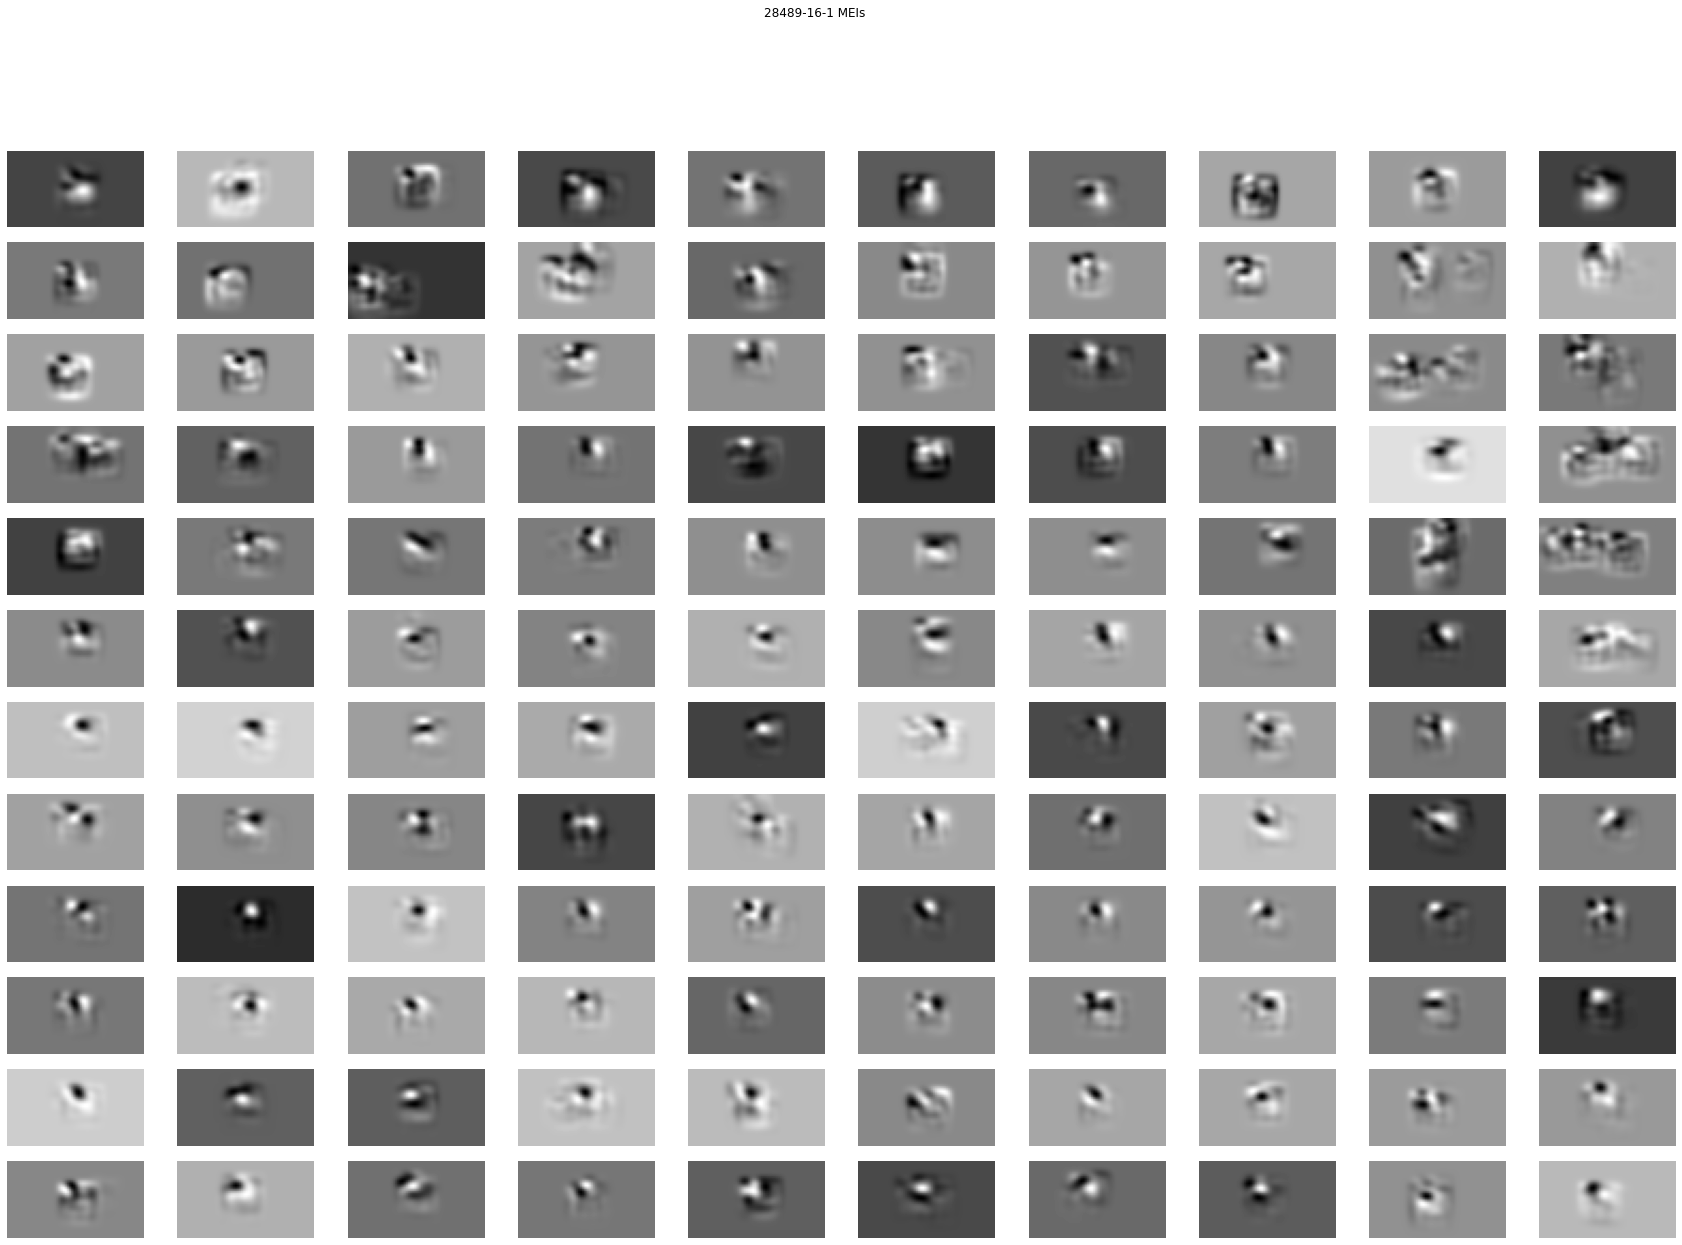

In [49]:
fig, axs = plt.subplots(12,10, figsize=(30,20))
for i, ax in enumerate(axs.ravel()):
    if i < len(MEIs):
        ax.imshow(MEIs[i], cmap="gray")
    ax.axis("off")
fig.suptitle(f'{mei_key["data_key"]} MEIs')

In [38]:
#for the SOTA model
mei_key =  dict(data_key="28488-10-1", 
                    dataset_hash="1965faa22eda4e393f44274b83d748d2",
                    ensemble_hash = "1ead3a66246aa489b445179a941e95b5",
                    method_hash="8c7de77acabedc9479aa207d8e914e9d", 
                    mei_seed=1000)

mei_dict = (MEI & mei_key).fetch("mei", "method_hash", "ensemble_hash", "data_key", "unit_id", "dataset_hash", order_by=("unit_id", "data_key"), as_dict=True,)

len(mei_dict)

mei_paths = [i.pop("mei") for i in mei_dict]

MEIs = np.stack([torch.load(i).detach().cpu().numpy().squeeze() for i in mei_paths])

In [39]:
#for the LN model
ln_mei_key =  dict(data_key="28488-10-1", 
                    dataset_hash="1965faa22eda4e393f44274b83d748d2",
                    ensemble_hash = "782a9281479eb90a9ca9383ee192c41f",
                    method_hash="8c7de77acabedc9479aa207d8e914e9d", 
                    mei_seed=1000)

ln_mei_dict = (MEI & ln_mei_key).fetch("mei", "method_hash", "ensemble_hash", "data_key", "unit_id", "dataset_hash", order_by=("unit_id", "data_key"), as_dict=True,)

len(ln_mei_dict)

ln_mei_paths = [i.pop("mei") for i in ln_mei_dict]

ln_MEIs = np.stack([torch.load(i).detach().cpu().numpy().squeeze() for i in ln_mei_paths])

Text(0.5, 0.98, '28488-10-1 MEIs')

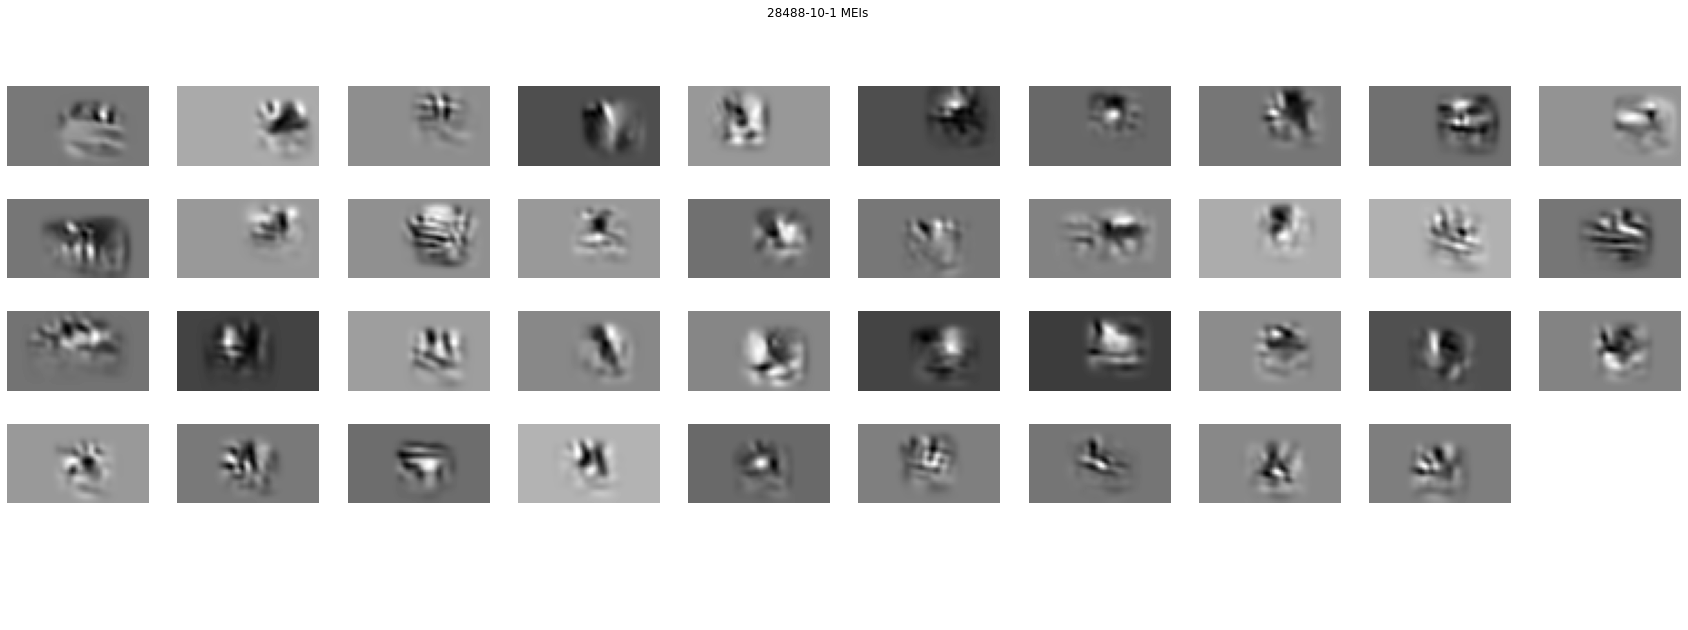

In [40]:
fig, axs = plt.subplots(5,10, figsize=(30,10))
for i, ax in enumerate(axs.ravel()):
    if i < len(MEIs):
        ax.imshow(MEIs[i], cmap="gray")
        #ax.set_title(f'{keys[ipth]}\n unit: {units[ipth]}')
    ax.axis("off")
fig.suptitle(f'{mei_key["data_key"]} MEIs')

Text(0.5, 0.98, '28488-10-1 linear MEIs')

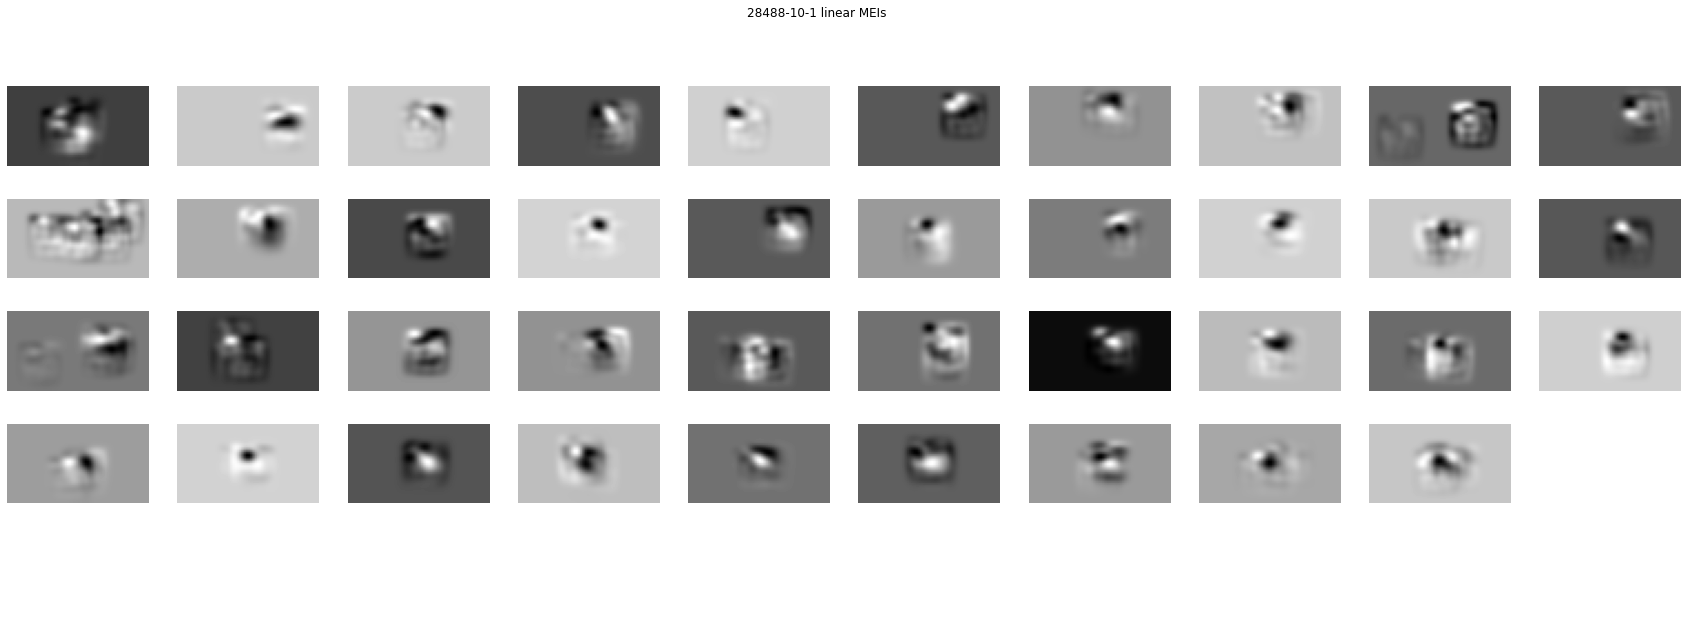

In [41]:
fig, axs = plt.subplots(5,10, figsize=(30,10))
for i, ax in enumerate(axs.ravel()):
    if i < len(ln_MEIs):
        ax.imshow(ln_MEIs[i], cmap="gray")
        #ax.set_title(f'{keys[ipth]}\n unit: {units[ipth]}')        
    ax.axis("off")
fig.suptitle(f'{ln_mei_key["data_key"]} linear MEIs')

In [25]:
#for the SOTA model
mei_key =  dict(data_key="28488-16-1", 
                    dataset_hash="97abf77dd9cf4adfe2772ad384abffe5",
                    ensemble_hash = "124344b808a17e5b31eeca196e4abcae",
                    method_hash="8c7de77acabedc9479aa207d8e914e9d", 
                    mei_seed=1000)

mei_dict = (MEI & mei_key).fetch("mei", "method_hash", "ensemble_hash", "data_key", "unit_id", "dataset_hash", order_by=("unit_id", "data_key"), as_dict=True,)

len(mei_dict)

mei_paths = [i.pop("mei") for i in mei_dict]

MEIs = np.stack([torch.load(i).detach().cpu().numpy().squeeze() for i in mei_paths])

In [26]:
#for the LN model
ln_mei_key =  dict(data_key="28488-16-1", 
                    dataset_hash="97abf77dd9cf4adfe2772ad384abffe5",
                    ensemble_hash = "693ee89f939d32865dba3e1d36eb1705",
                    method_hash="8c7de77acabedc9479aa207d8e914e9d", 
                    mei_seed=1000)

ln_mei_dict = (MEI & ln_mei_key).fetch("mei", "method_hash", "ensemble_hash", "data_key", "unit_id", "dataset_hash", order_by=("unit_id", "data_key"), as_dict=True,)

len(ln_mei_dict)

ln_mei_paths = [i.pop("mei") for i in ln_mei_dict]

ln_MEIs = np.stack([torch.load(i).detach().cpu().numpy().squeeze() for i in ln_mei_paths])

In [29]:
MEIs

array([[[-4.9339915e-22,  1.3042632e-22, -1.8505055e-22, ...,
          9.9911614e-22,  1.6701725e-22, -1.7004939e-21],
        [-1.1531463e-21,  4.7264037e-22,  1.3625202e-21, ...,
          9.9799482e-22, -9.1237739e-22,  7.7368413e-22],
        [-4.2917656e-23,  1.4127561e-21,  1.5594655e-21, ...,
         -1.3764406e-22,  7.5566296e-22,  1.0732536e-21],
        ...,
        [ 7.6540056e-22, -2.1613307e-21, -1.4103208e-21, ...,
          8.4072221e-22, -5.7057267e-22, -1.8995181e-21],
        [ 3.2424362e-22,  6.1910672e-22,  4.5296661e-22, ...,
          1.9120658e-22, -5.9173418e-22, -8.3683385e-22],
        [ 1.8655221e-22,  3.7562951e-22,  8.1258469e-22, ...,
          1.2199505e-22,  3.9713615e-23,  1.5621271e-22]],

       [[-1.1523425e-25,  3.0461229e-26, -4.3218752e-26, ...,
          5.1468317e-07,  3.9007039e-26, -3.9715274e-25],
        [-2.6931815e-25,  1.1038573e-25,  3.1821803e-25, ...,
         -1.2411897e-07, -2.1308698e-25,  1.8069491e-25],
        [-1.0023458e-26, 

Text(0.5, 0.98, '28488-16-1 MEIs')

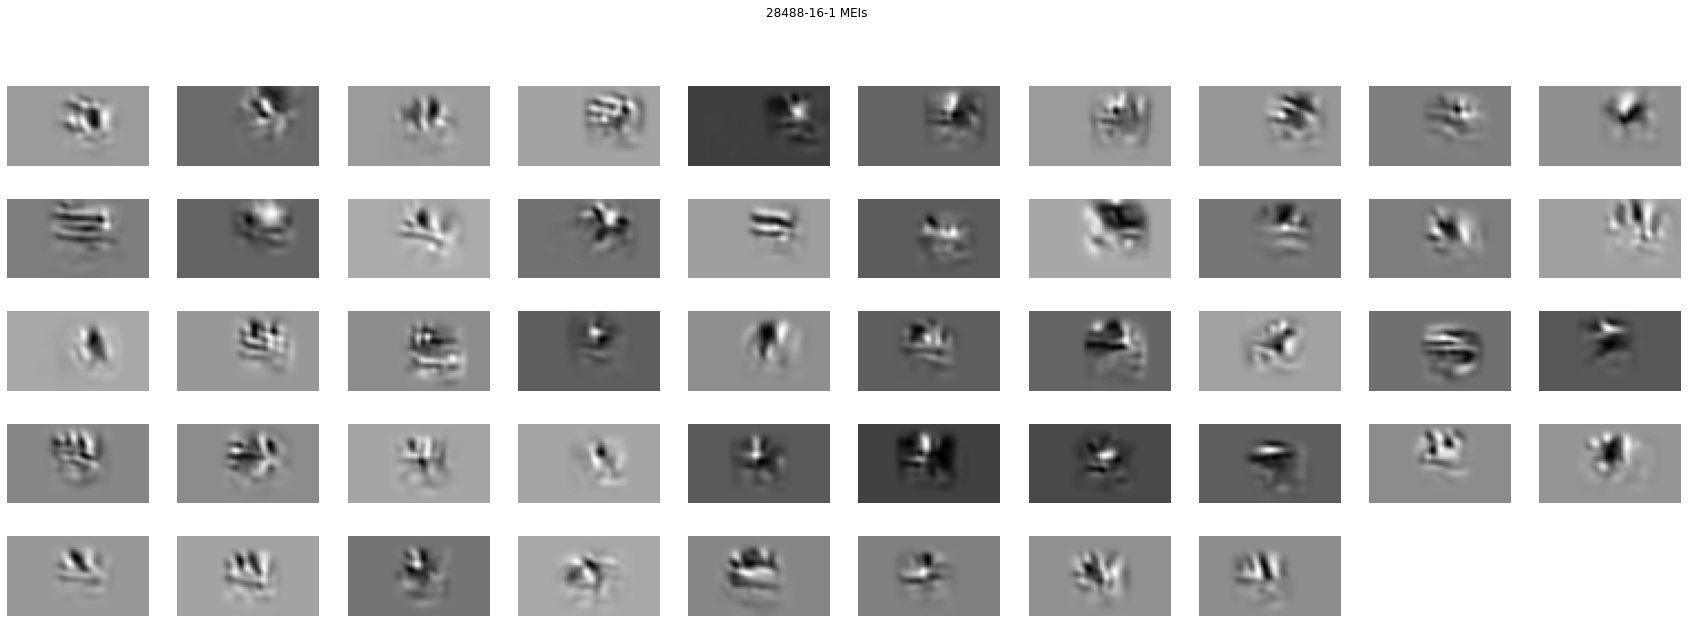

In [36]:
fig, axs = plt.subplots(5,10, figsize=(30,10))
for i, ax in enumerate(axs.ravel()):
    if i < len(MEIs):
        ax.imshow(MEIs[i], cmap="gray")
        #ax.set_title(f'{keys[ipth]}\n unit: {units[ipth]}')
    ax.axis("off")
fig.suptitle(f'{mei_key["data_key"]} MEIs')

Text(0.5, 0.98, '28488-16-1 linear MEIs')

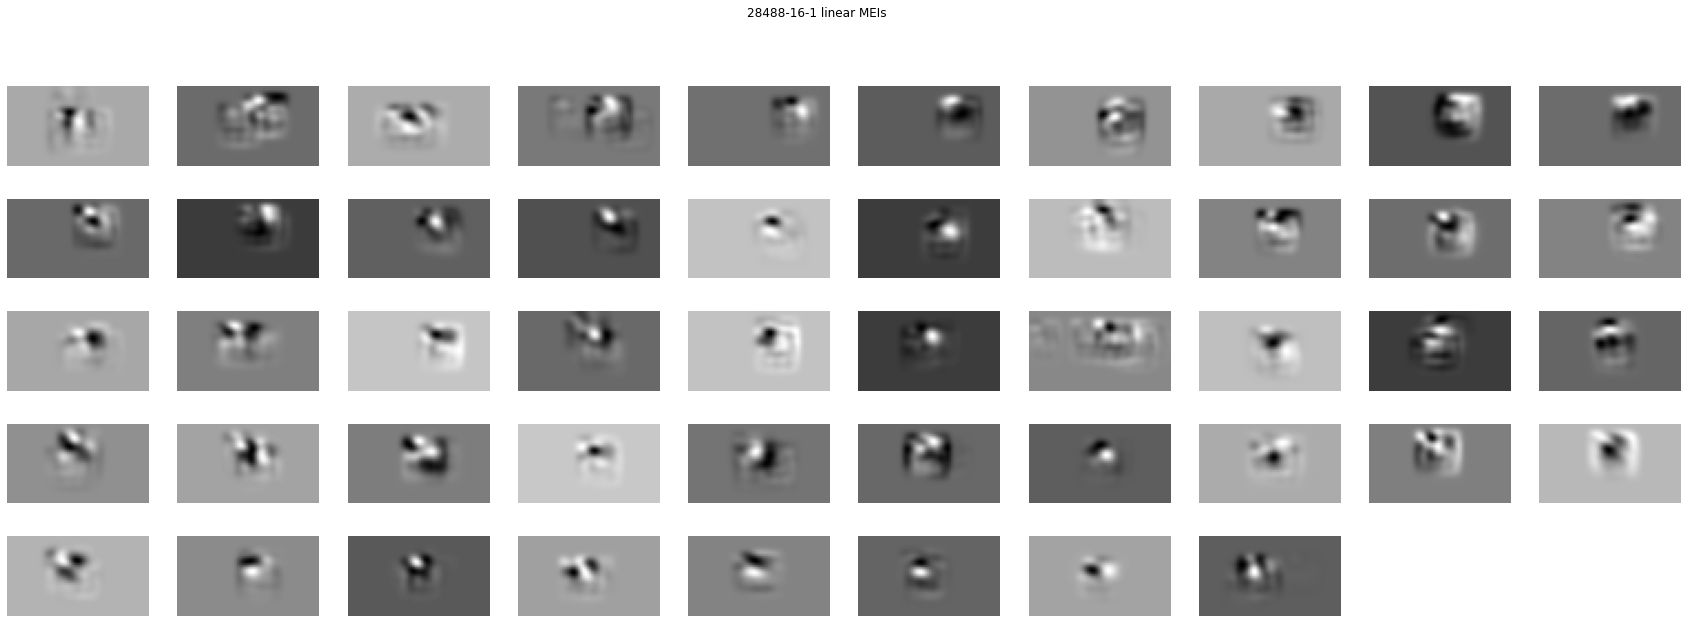

In [37]:
fig, axs = plt.subplots(5,10, figsize=(30,10))
for i, ax in enumerate(axs.ravel()):
    if i < len(ln_MEIs):
        ax.imshow(ln_MEIs[i], cmap="gray")
        #ax.set_title(f'{keys[ipth]}\n unit: {units[ipth]}')        
    ax.axis("off")
fig.suptitle(f'{ln_mei_key["data_key"]} linear MEIs')

In [13]:
#for the SOTA model
mei_key =  dict(data_key="28470-13-1", 
                    dataset_hash="17a917c720720314835865d32cac93f3",
                    ensemble_hash = "7ea32448df4a75966d8fcd059a6eb0ae",
                    method_hash="8c7de77acabedc9479aa207d8e914e9d", 
                    mei_seed=1000)

mei_dict = (MEI & mei_key).fetch("mei", "method_hash", "ensemble_hash", "data_key", "unit_id", "dataset_hash", order_by=("unit_id", "data_key"), as_dict=True,)

len(mei_dict)

mei_paths = [i.pop("mei") for i in mei_dict]

MEIs = np.stack([torch.load(i).detach().cpu().numpy().squeeze() for i in mei_paths])

In [14]:
#for the LN model
ln_mei_key =  dict(data_key="28470-13-1", 
                    dataset_hash="17a917c720720314835865d32cac93f3",
                    ensemble_hash = "1a3577a497b19ae3a45a35442397cf3a",
                    method_hash="8c7de77acabedc9479aa207d8e914e9d", 
                    mei_seed=1000)

ln_mei_dict = (MEI & ln_mei_key).fetch("mei", "method_hash", "ensemble_hash", "data_key", "unit_id", "dataset_hash", order_by=("unit_id", "data_key"), as_dict=True,)

len(ln_mei_dict)

ln_mei_paths = [i.pop("mei") for i in ln_mei_dict]

ln_MEIs = np.stack([torch.load(i).detach().cpu().numpy().squeeze() for i in ln_mei_paths])

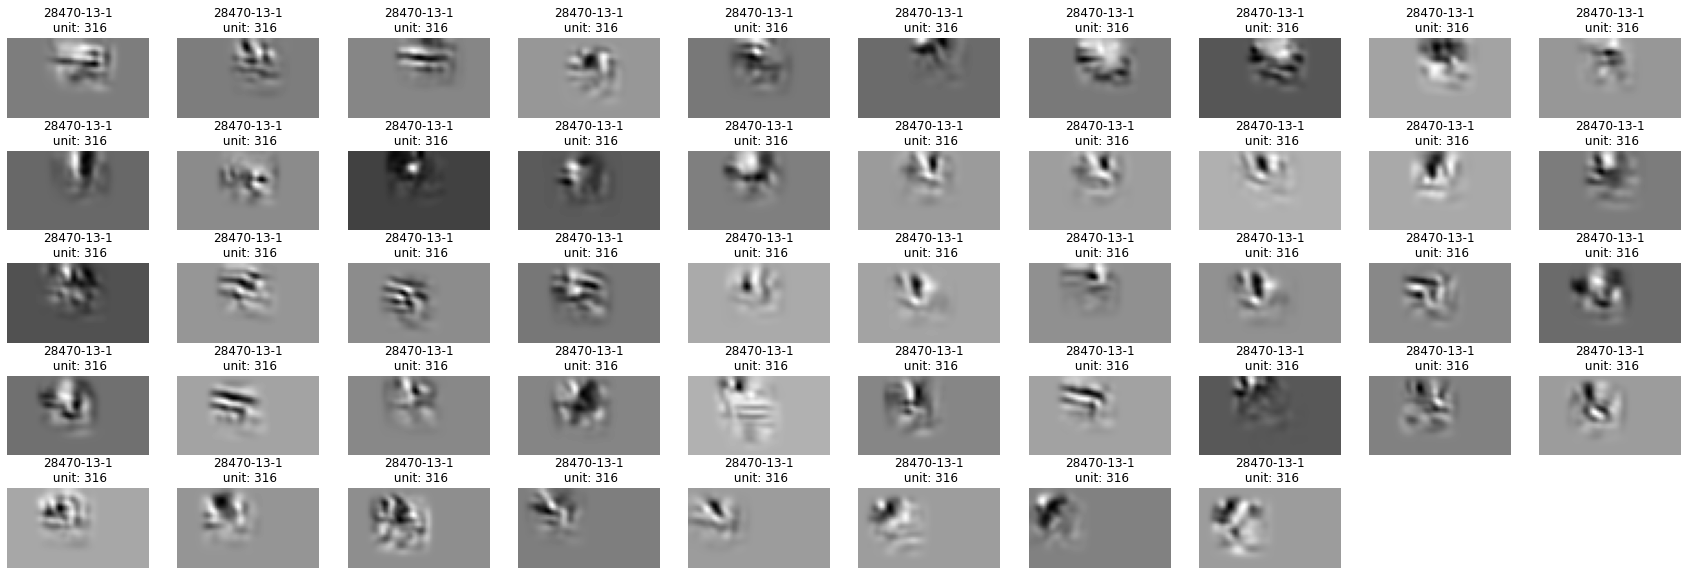

In [23]:
fig, axs = plt.subplots(5,10, figsize=(30,10))
for i, ax in enumerate(axs.ravel()):
    if i < len(MEIs):
        ax.imshow(MEIs[i], cmap="gray")
        ax.set_title(f'{keys[ipth]}\n unit: {units[ipth]}')
    ax.axis("off")

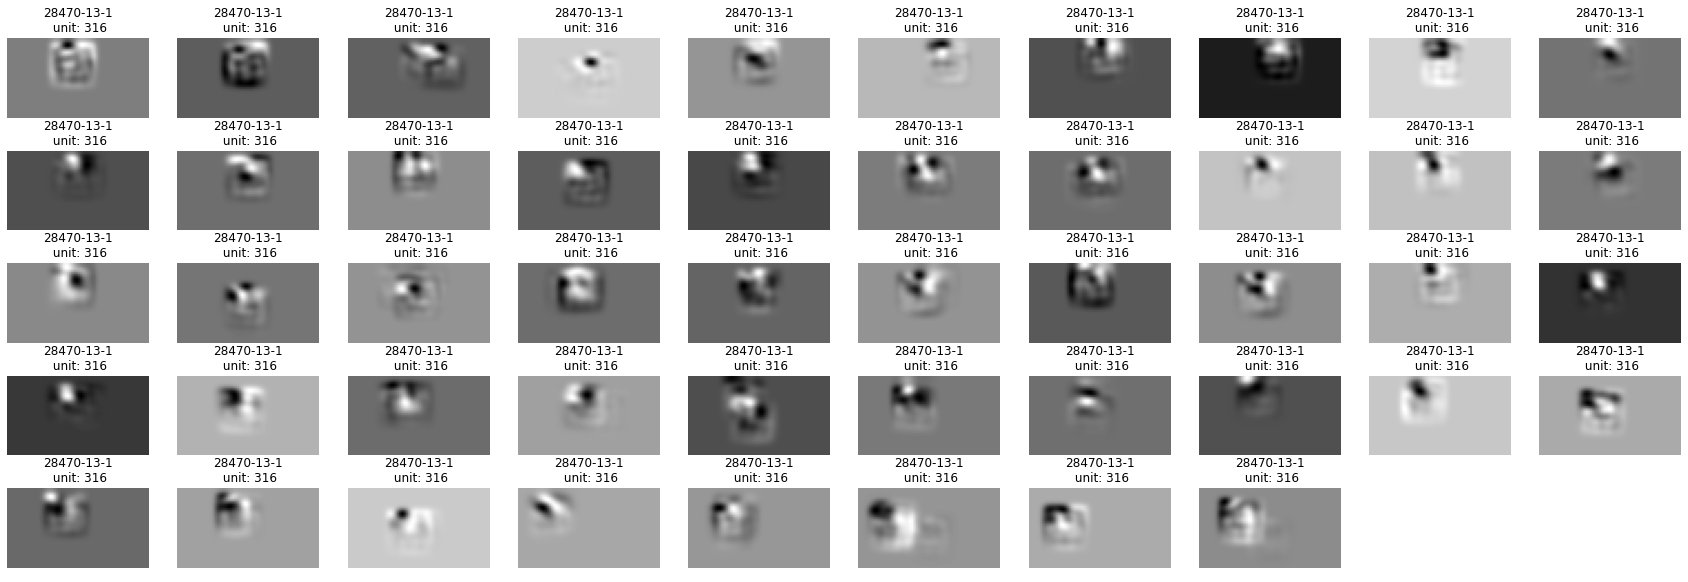

In [24]:
fig, axs = plt.subplots(5,10, figsize=(30,10))
for i, ax in enumerate(axs.ravel()):
    if i < len(ln_MEIs):
        ax.imshow(ln_MEIs[i], cmap="gray")
        ax.set_title(f'{keys[ipth]}\n unit: {units[ipth]}')        
    ax.axis("off")

In [5]:
(MEI() & 'dataset_hash = "17a917c720720314835865d32cac93f3"')

method_fn name of the method function,method_hash hash of the method config,dataset_fn name of the dataset loader function,dataset_hash hash of the configuration object,ensemble_hash the hash of the ensemble,unit_id unique neuron identifier,data_key unique session identifier,mei_seed MEI seed,mei the MEI as a tensor,score some score depending on the used method function,output object returned by the method function
mei.methods.gradient_ascent,8c7de77acabedc9479aa207d8e914e9d,sensorium.datasets.static_loaders,17a917c720720314835865d32cac93f3,1a3577a497b19ae3a45a35442397cf3a,43,28470-13-1,1000,=BLOB=,2.97301,=BLOB=
mei.methods.gradient_ascent,8c7de77acabedc9479aa207d8e914e9d,sensorium.datasets.static_loaders,17a917c720720314835865d32cac93f3,1a3577a497b19ae3a45a35442397cf3a,51,28470-13-1,1000,=BLOB=,1.88006,=BLOB=
mei.methods.gradient_ascent,8c7de77acabedc9479aa207d8e914e9d,sensorium.datasets.static_loaders,17a917c720720314835865d32cac93f3,1a3577a497b19ae3a45a35442397cf3a,85,28470-13-1,1000,=BLOB=,2.29115,=BLOB=
mei.methods.gradient_ascent,8c7de77acabedc9479aa207d8e914e9d,sensorium.datasets.static_loaders,17a917c720720314835865d32cac93f3,1a3577a497b19ae3a45a35442397cf3a,102,28470-13-1,1000,=BLOB=,2.44374,=BLOB=
mei.methods.gradient_ascent,8c7de77acabedc9479aa207d8e914e9d,sensorium.datasets.static_loaders,17a917c720720314835865d32cac93f3,1a3577a497b19ae3a45a35442397cf3a,106,28470-13-1,1000,=BLOB=,2.02265,=BLOB=
mei.methods.gradient_ascent,8c7de77acabedc9479aa207d8e914e9d,sensorium.datasets.static_loaders,17a917c720720314835865d32cac93f3,1a3577a497b19ae3a45a35442397cf3a,107,28470-13-1,1000,=BLOB=,2.80873,=BLOB=
mei.methods.gradient_ascent,8c7de77acabedc9479aa207d8e914e9d,sensorium.datasets.static_loaders,17a917c720720314835865d32cac93f3,1a3577a497b19ae3a45a35442397cf3a,111,28470-13-1,1000,=BLOB=,2.33421,=BLOB=
mei.methods.gradient_ascent,8c7de77acabedc9479aa207d8e914e9d,sensorium.datasets.static_loaders,17a917c720720314835865d32cac93f3,1a3577a497b19ae3a45a35442397cf3a,116,28470-13-1,1000,=BLOB=,1.50931,=BLOB=
mei.methods.gradient_ascent,8c7de77acabedc9479aa207d8e914e9d,sensorium.datasets.static_loaders,17a917c720720314835865d32cac93f3,1a3577a497b19ae3a45a35442397cf3a,120,28470-13-1,1000,=BLOB=,2.43148,=BLOB=
mei.methods.gradient_ascent,8c7de77acabedc9479aa207d8e914e9d,sensorium.datasets.static_loaders,17a917c720720314835865d32cac93f3,1a3577a497b19ae3a45a35442397cf3a,126,28470-13-1,1000,=BLOB=,3.16019,=BLOB=


In [7]:
len(units)

96

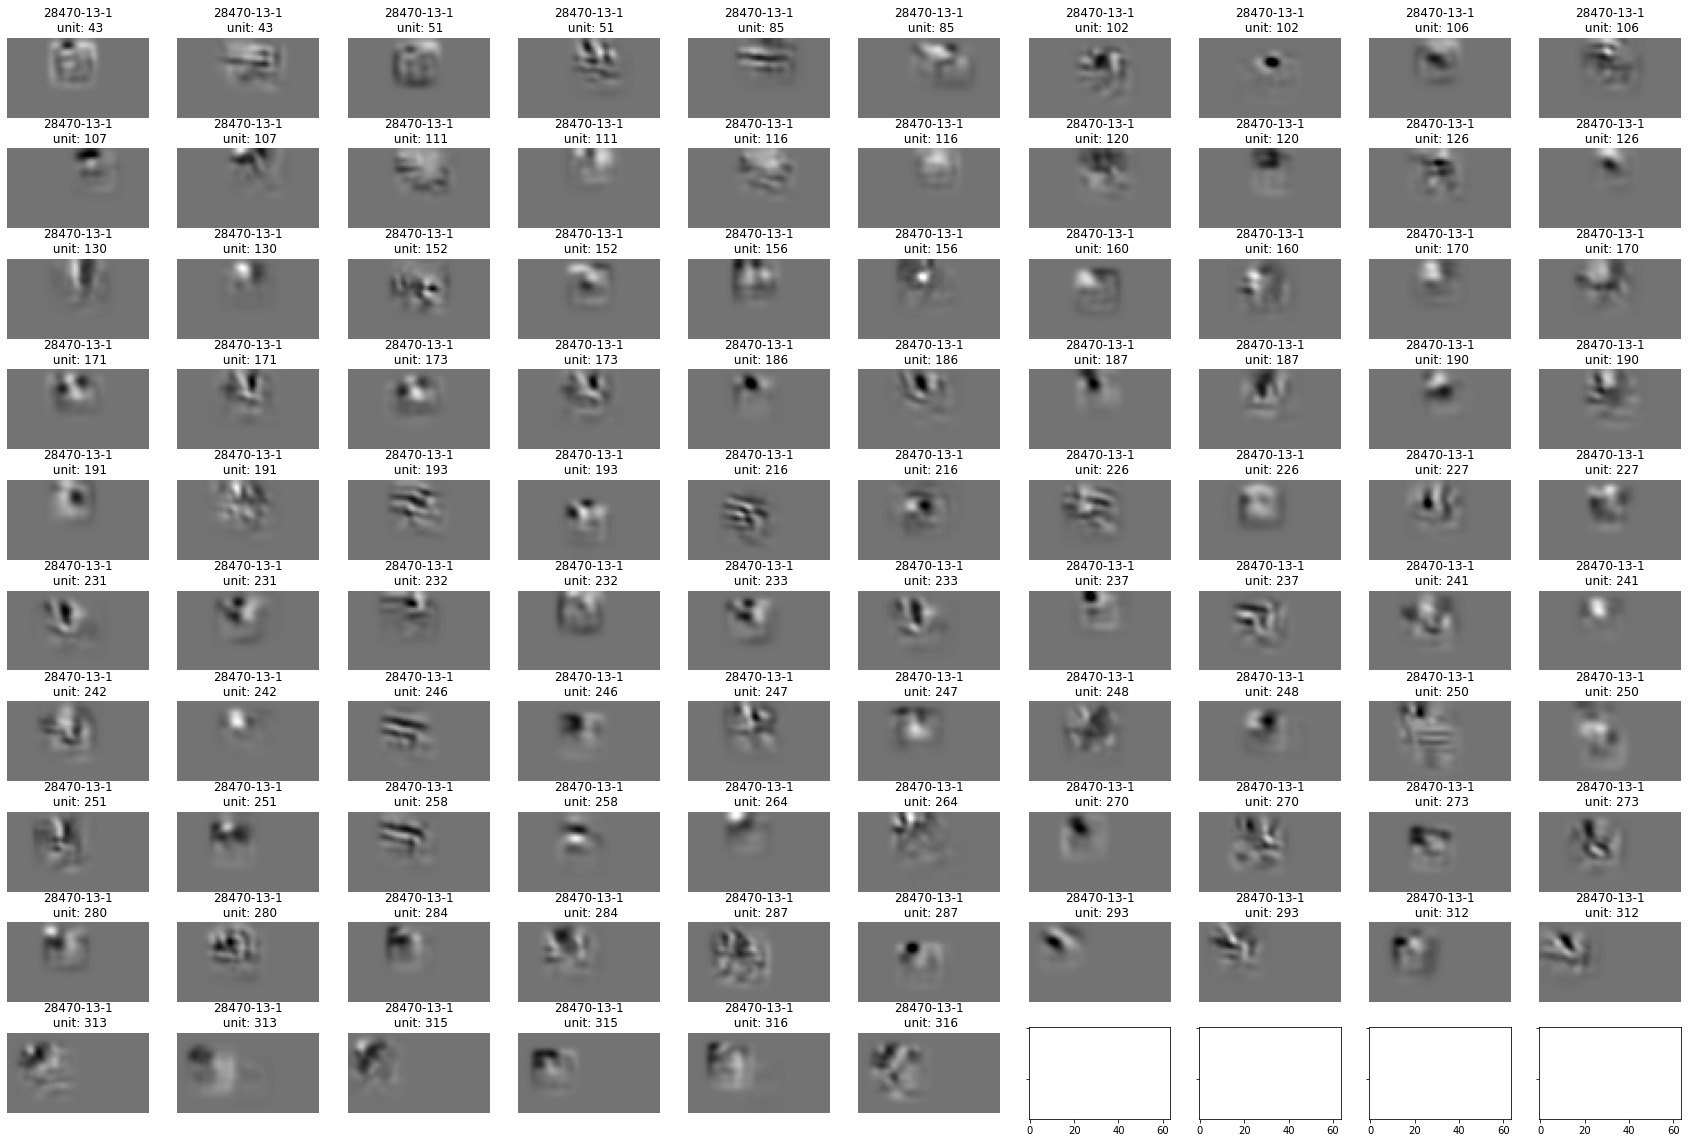

In [6]:
units, keys, mei_path = (MEI() & 'dataset_hash = "17a917c720720314835865d32cac93f3"').fetch("unit_id", "data_key", "mei", order_by=('data_key','unit_id'))

ncol = 10
nrow = math.ceil((len(keys)/ncol))


fig, ax = plt.subplots(nrows=nrow, ncols=ncol, sharex=True, sharey=True, figsize=(30, 20), gridspec_kw = {'wspace':0.2, 'hspace':0.2}) 
ax = ax.ravel()
i=0
for ipth in range(len(mei_path)):
    mei = torch.load(mei_path[ipth])
    #print(mei)
    mei_array = mei.detach().cpu().numpy().squeeze()
    ax[i].imshow(mei_array, cmap="gray", vmin=-1.8, vmax=2.2)
    ax[i].axes.xaxis.set_visible(False)
    ax[i].axes.yaxis.set_visible(False)
    ax[i].axis("off") 
    ax[i].set_title(f'{keys[ipth]}\n unit: {units[ipth]}')
    #ax[i].set_title(f'{i}')
    i=i+1

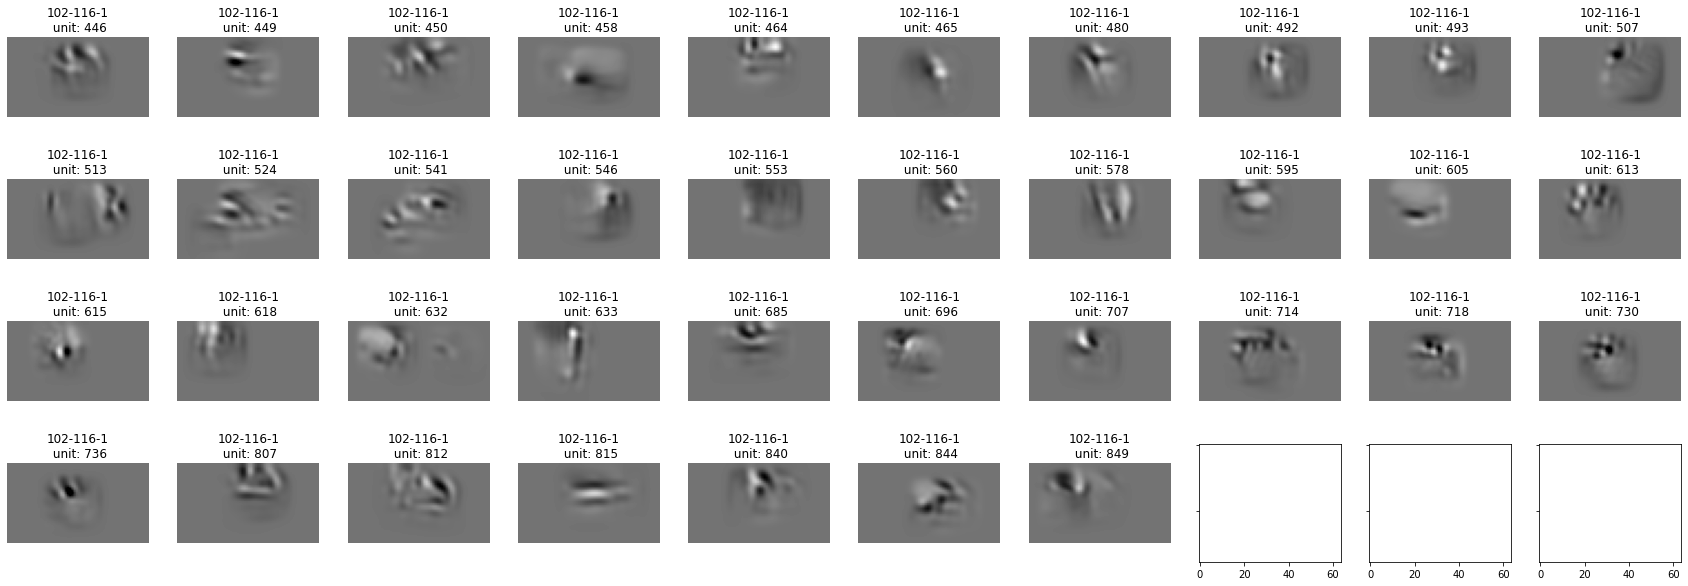

In [78]:
units, keys, mei_path = (MEI() & 'data_key = "102-116-1"').fetch("unit_id", "data_key", "mei", order_by=('data_key','unit_id'))

ncol = 10
nrow = math.ceil((len(keys)/ncol))


fig, ax = plt.subplots(nrows=nrow, ncols=ncol, sharex=True, sharey=True, figsize=(30, 10), gridspec_kw = {'wspace':0.2, 'hspace':0.2}) 
ax = ax.ravel()
i=0
for ipth in range(len(mei_path)):
    mei = torch.load(mei_path[ipth])
    #print(mei)
    mei_array = mei.detach().cpu().numpy().squeeze()
    ax[i].imshow(mei_array, cmap="gray", vmin=-1.8, vmax=2.2)
    ax[i].axes.xaxis.set_visible(False)
    ax[i].axes.yaxis.set_visible(False)
    ax[i].axis("off") 
    ax[i].set_title(f'{keys[ipth]}\n unit: {units[ipth]}')
    #ax[i].set_title(f'{i}')
    i=i+1

#fig.savefig('npx_meis_102_116_sua.pdf')
#fig.tight_layout()

In [45]:
mei_df = (MEI() & 'data_key = "102-110-1"').fetch(format="frame", order_by='unit_id asc')
mei_df

mei  \
method_fn                   method_hash                      dataset_fn                        dataset_hash                     ensemble_hash                    unit_id data_key  mei_seed                                                      
mei.methods.gradient_ascent 8c7de77acabedc9479aa207d8e914e9d sensorium.datasets.static_loaders 50acf7555b481ed768dcbc381c9edf30 1b28b1e932d6108704c661703408fca1 534     102-110-1 1000      mei_XBQWgzweDkIBioQpxRFmRQxoZDlcRVFj.pth_0006.tar   
                                                                                                                                                                 541     102-110-1 1000      mei_JhmsyuQoowNFhsyDxFMrEvadjCPTeosY.pth_0006.tar   
                                                                                                                                                                 542     102-110-1 1000      mei_TkgFANDyzHbtdcmmgvmjgeiJrnJvgUnO.pth_0006.tar   
                                                                                                                                                                 544     102-110-1 1000      mei_qHATXaPcDVMdRyeSErTOnbBgYsnvovoa.pth_0006.tar   
                                                                                                                                                                 545     102-110-1 1000      mei_FBNnljsVPBshWqiCOzkEoqqIewVIZHfW.pth_0006.tar   
...                                                                                                                                                                                                                                        ...   
                                                                                                                                                                 924     102-110-1 1000      mei_acIQHGvZZFgUIqfknPfWKgjENTvGFVsE.pth_0001.tar   
                                                                                                                                                                 925     102-110-1 1000      mei_KeDRHpWggyJkhsMGjIkUtqTjwWqpAmhJ.pth_0001.tar   
                                                                                                                                                                 928     102-110-1 1000      mei_SyqHhxNuxooalGZYPbxPoZbUdwaKDXEm.pth_0001.tar   
                                                                                                                                                                 929     102-110-1 1000      mei_KcJVmSrmLOGBCRoHOlBGQDptDQdhZYxn.pth_0001.tar   
                                                                                                                                                                 930     102-110-1 1000      mei_KVplxkDKYeOWcOGjtYNvyUbvAjRdcYJb.pth_0001.tar   

                                                                                                                                                                                                score  \
method_fn                   method_hash                      dataset_fn                        dataset_hash                     ensemble_hash                    unit_id data_key  mei_seed             
mei.methods.gradient_ascent 8c7de77acabedc9479aa207d8e914e9d sensorium.datasets.static_loaders 50acf7555b481ed768dcbc381c9edf30 1b28b1e932d6108704c661703408fca1 534     102-110-1 1000      1.002910   
                                                                                                                                                                 541     102-110-1 1000      0.963177   
                                                                                                                                                                 542     102-110-1 1000      1.650500   
                                                                                   

array([[<AxesSubplot:title={'center':'score'}>]], dtype=object)

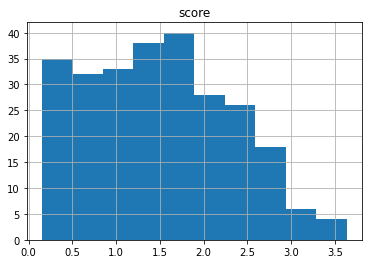

In [46]:
mei_df.hist()

In [43]:
npx = dj.create_virtual_module('neuropixels.py', 'lab_neuropixels')

In [47]:
key = {'animal_id' : 102,
       'session' : 110}

In [51]:
npx.UnitArea() & key & 'unit_id = 634'

animal_id,session,rec_idx,sort_idx,unit_id,area
102,110,1,1,634,LVA


In [56]:
area[0]

'LVA'

In [69]:
key = {'animal_id' : 102,
       'session' : 116}

units, mei_path = (MEI() & 'data_key = "102-116-1"').fetch("unit_id", "mei", order_by=('unit_id asc'))
max_depth = np.max((npx.ClusterInfo & key).fetch('depth'))

data_list = []

for ipth, path in enumerate(mei_path):
    mei = torch.load(path)
    #print(mei)
    mei_array = mei.detach().cpu().numpy().squeeze()
    area = (npx.UnitArea() & key & f'unit_id = {units[ipth]}').fetch('area')[0]
    unit_depth = max_depth - (npx.ClusterInfo & key & f'unit_id = {units[ipth]}').fetch('depth')[0] 
    
    data_list.append([key['animal_id'], key['session'], units[ipth], area, unit_depth, mei_array])

    
   

NameError: name 'npx' is not defined

In [71]:
import pandas as pd

In [72]:
data_df = pd.DataFrame(data_list, columns=['animal_id', 'session', 'unit_id', 'area', 'depth', 'mei'])
data_df

,animal_id,session,unit_id,area,depth,mei
0,102,110,534,LVA,2060.0,"[[-6.077079e-09, 1.606425e-09, -2.2792208e-09,..."
1,102,110,541,LVA,2040.0,"[[-1.2833473e-09, 3.392421e-10, -6.959009e-10,..."
2,102,110,542,LVA,2060.0,"[[-6.2818515e-19, 1.660559e-19, -2.356022e-19,..."
3,102,110,544,LVA,2020.0,"[[-7.145723e-11, 1.8889144e-11, -2.680013e-11,..."
4,102,110,545,LVA,2060.0,"[[-6.3340854e-16, 1.6743635e-16, -2.3756077e-1..."
5,102,110,546,LVA,2040.0,"[[-0.0030531413, 0.00080707314, -0.0011450843,..."
6,102,110,547,LVA,2040.0,"[[-2.230307e-23, 5.8956384e-24, -8.364793e-24,..."
7,102,110,548,LVA,2000.0,"[[-6.87504e-10, 1.8173617e-10, -2.5784952e-10,..."
8,102,110,549,LVA,2000.0,"[[-7.340569e-13, 1.9404178e-13, -2.7530924e-13..."
9,102,110,550,LVA,2000.0,"[[-9.747667e-11, 2.576718e-11, -3.6558784e-11,..."


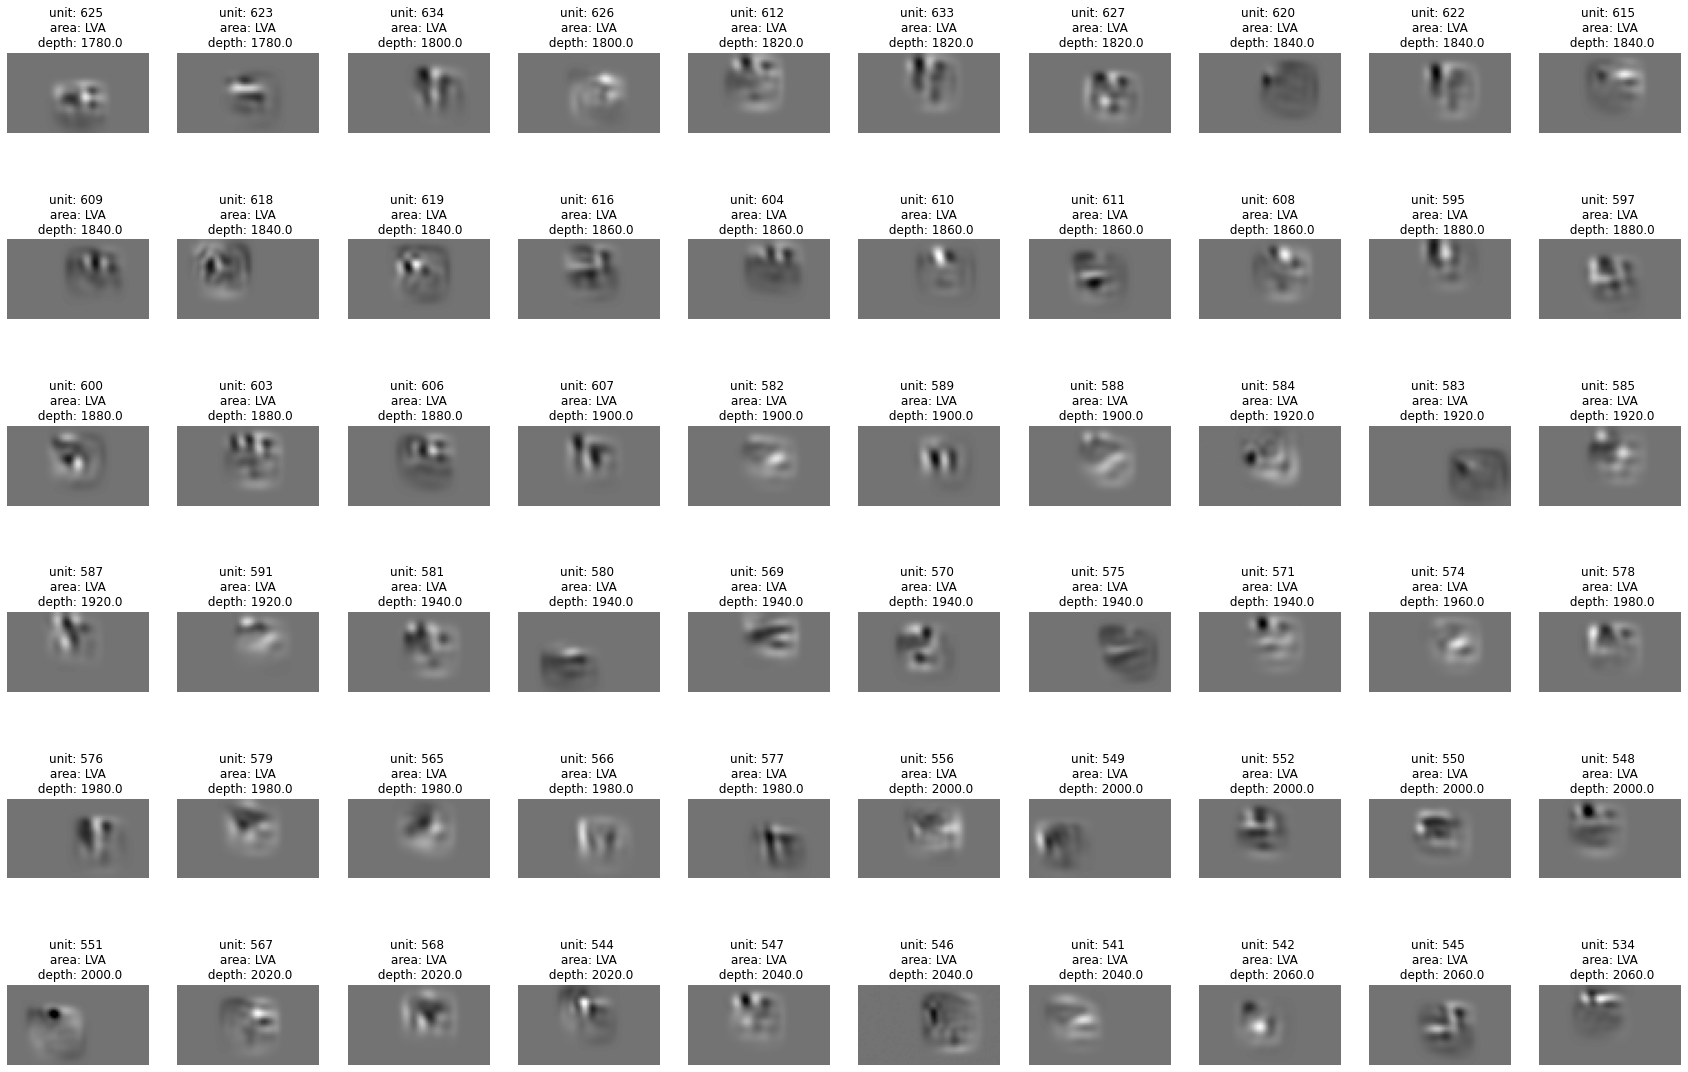

In [93]:
data_df = data_df.sort_values(by=['depth'])
data_df = data_df.reset_index(drop=True)

ncol = 10
nrow = math.ceil((len(data_df)/ncol))


fig, ax = plt.subplots(nrows=nrow, ncols=ncol, sharex=True, sharey=True, figsize=(30, 20), gridspec_kw = {'wspace':0.2, 'hspace':0.2}) 
ax = ax.ravel()
i=0
for ipth in range(len(data_df)):
    
    ax[i].imshow(data_df['mei'][ipth], cmap="gray", vmin=-1.8, vmax=2.2)
    ax[i].axes.xaxis.set_visible(False)
    ax[i].axes.yaxis.set_visible(False)
    ax[i].axis("off") 
    #ax[i].set_title(f'{keys[ipth]}, unit: {units[ipth]}')
    ax[i].set_title(f'unit: {data_df["unit_id"][ipth]} \n area: {data_df["area"][ipth]} \n depth: {data_df["depth"][ipth]}')
    i=i+1